In [120]:
#Import the essential tools for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from pandas.api.types import CategoricalDtype

sb.set()

In [121]:
# Import cleaned dataframe
df = pd.read_csv("2-cleaned-heart-disease-dataset.csv")

#Create a list that contains string name of categorical predictors.
catPredictorList = ['SMOKING','ALCOHOLDRINKING','STROKE','DIFFWALKING','SEX','AGECATEGORY','RACE','DIABETIC','GENHEALTH','ASTHMA','KIDNEYDISEASE','SKINCANCER']

#Create a list that contains string name of numeric predictors
numPredictorList = ['BMI','PHYSICALHEALTH','MENTALHEALTH','SLEEPTIME']

In [122]:
df.head()

,Unnamed: 0,HEARTDISEASE,BMI,SMOKING,ALCOHOLDRINKING,STROKE,PHYSICALHEALTH,MENTALHEALTH,DIFFWALKING,SEX,AGECATEGORY,RACE,DIABETIC,PHYSICALACTIVITY,GENHEALTH,SLEEPTIME,ASTHMA,KIDNEYDISEASE,SKINCANCER
0,0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


The first column "Unnamed: 0 is not used, therefore removal of that column is needed

In [123]:
df.drop(columns = "Unnamed: 0", axis = 1, inplace=True)

In [124]:
#Check if the column is removed
df.head()

,HEARTDISEASE,BMI,SMOKING,ALCOHOLDRINKING,STROKE,PHYSICALHEALTH,MENTALHEALTH,DIFFWALKING,SEX,AGECATEGORY,RACE,DIABETIC,PHYSICALACTIVITY,GENHEALTH,SLEEPTIME,ASTHMA,KIDNEYDISEASE,SKINCANCER
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


The column "Unnamed: 0" has been successfully removed.

# Exploratory Data Analysis

# Overview summary of data

In [125]:
#display number of rows (data) and number of cols (variables)
df.shape

(319795, 18)

There are 319795 data and 18 variables

In [126]:
#Display summary of numeric variable
#Provide a basic insight of how the variables are distributed by looking its std, min, max, mean, median, and quartile
df[numPredictorList].describe()

,BMI,PHYSICALHEALTH,MENTALHEALTH,SLEEPTIME
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


At least 50% of the data in PHYSICALHEALTH and MENTALHEALTH are 0 which indicates that the person does not have physical health issue in the past 30days.



# Univariate Analysis


Purpose of univariate analysis is to use data to find pattern in the data

In [127]:
# Helper functions


# Univariate analysis for binary variables
#Plot categoric plot
#x-axis is categoric variable
#y-axis is the cardinality
def uniBinAnalysis (string,df,state1,state2):
    f = plt.figure(figsize=(16,8))
    sb.catplot(y=string,data=df,kind='count')
    no,yes = df[string].value_counts()
    print("Ratio of classes is \n",state1,' : ',state2,' =\n', no, ":", yes)

In [128]:
#Univariate analysis for numeric variables
#Plot histogram, violinplot
#x-axis is the numeric variable
#y-axis is the frequency (histogram) or density(violin)
def uniNumAnalysis (string,df):
    strY = 'BMI'
    f, axes = plt.subplots(1, 2, figsize=(18, 4))
    sb.violinplot(data = df[string], orient = "h", ax = axes[0])
    sb.histplot(data = df[string], ax = axes[1])

In [129]:
#Univariate analysis for categoric variables
#Display the cardinality of each category of variables
#Plot categoric plot.
#x-axis is the categoric variable (categories are sorted according to the list passed)
#y-axis is the cardinality
def uniCatAnalysis (string,df,sortList):
    display(df[string].value_counts())
    

    df_temp = df
    catType = CategoricalDtype(categories = sortList, ordered = True)
    df_temp[string] = df_temp[string].astype(catType)

    sb.catplot(y = string, data = df_temp, kind = "count")

## Categorical Predictor Variables

Ratio of classes is 
 Have Heart Disease  :  Don't Have Heart Disease  =
 292422 : 27373


<Figure size 1152x576 with 0 Axes>

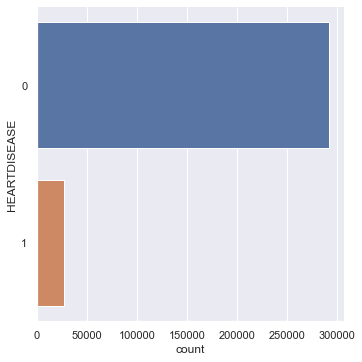

In [130]:
uniBinAnalysis("HEARTDISEASE",df,"Have Heart Disease","Don't Have Heart Disease")

Large class imbalance in Response Variable "HEARTDISEASE", possibly needs to resample in future

Ratio of classes is 
 Smoking  :  Does not smoke  =
 187887 : 131908


<Figure size 1152x576 with 0 Axes>

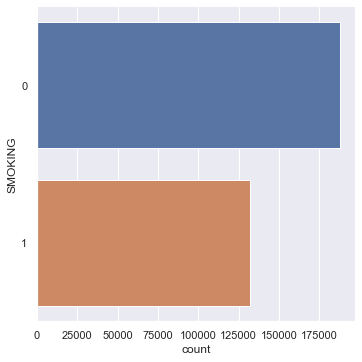

In [131]:
uniBinAnalysis("SMOKING",df,"Smoking","Does not smoke")

Ratio of classes is 
 Has Alcohol Drinking  :  Dont have Alcohol Drinking  =
 298018 : 21777


<Figure size 1152x576 with 0 Axes>

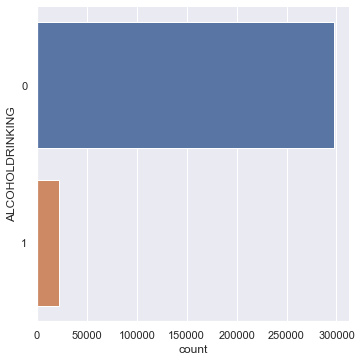

In [132]:
uniBinAnalysis('ALCOHOLDRINKING',df,'Has Alcohol Drinking','Dont have Alcohol Drinking')

Ratio of classes is 
 Has StrokE  :  Dont Have Stroke  =
 307726 : 12069


<Figure size 1152x576 with 0 Axes>

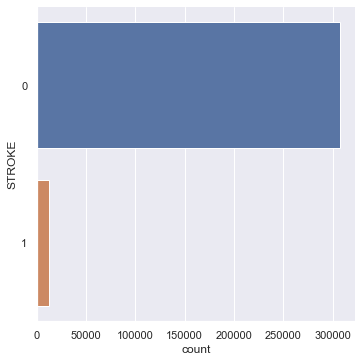

In [133]:
uniBinAnalysis('STROKE',df,'Has StrokE','Dont Have Stroke')

Ratio of classes is 
 Has Difficulty Walking  :  Dont Have Difficulty Walking  =
 275385 : 44410


<Figure size 1152x576 with 0 Axes>

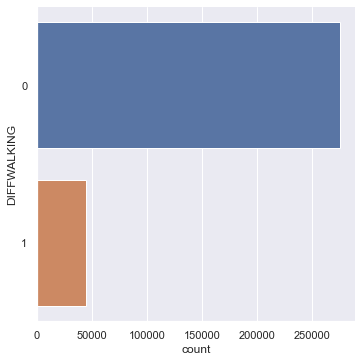

In [134]:
uniBinAnalysis('DIFFWALKING',df,'Has Difficulty Walking','Dont Have Difficulty Walking')

Ratio of classes is 
 Male  :  Female  =
 167805 : 151990


<Figure size 1152x576 with 0 Axes>

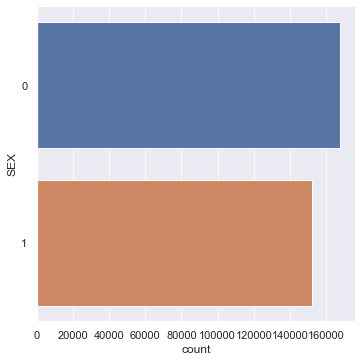

In [135]:
uniBinAnalysis('SEX',df,'Male','Female')

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: RACE, dtype: int64

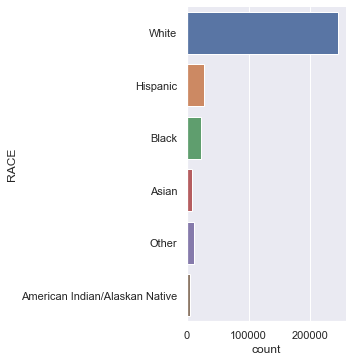

In [136]:
uniCatAnalysis('RACE',df,['White','Hispanic','Black','Asian','Other','American Indian/Alaskan Native'])

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GENHEALTH, dtype: int64

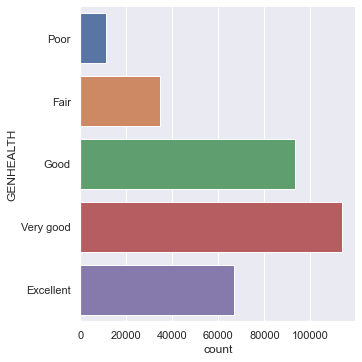

In [137]:
uniCatAnalysis('GENHEALTH',df,['Poor','Fair','Good','Very good','Excellent'])

Ratio of classes is 
 Has DIABETIC  :  Dont have DIABETIC  =
 276434 : 43361


<Figure size 1152x576 with 0 Axes>

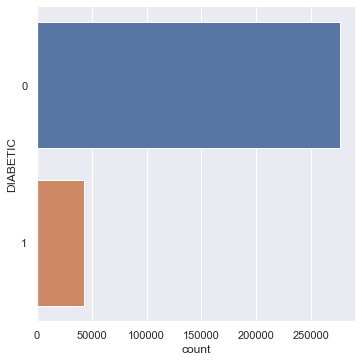

In [138]:
string='DIABETIC'
uniBinAnalysis(string,df,"Has "+string,"Dont have "+string)

Ratio of classes is 
 Has ASTHMA  :  Dont have ASTHMA  =
 276923 : 42872


<Figure size 1152x576 with 0 Axes>

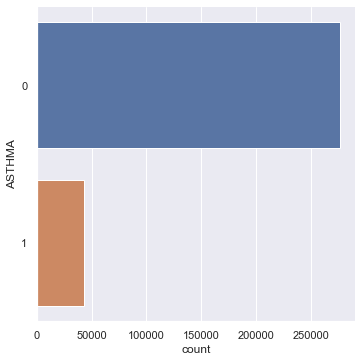

In [139]:
string='ASTHMA'
uniBinAnalysis(string,df,"Has "+string,"Dont have "+string)

Ratio of classes is 
 Has KIDNEYDISEASE  :  Dont have KIDNEYDISEASE  =
 308016 : 11779


<Figure size 1152x576 with 0 Axes>

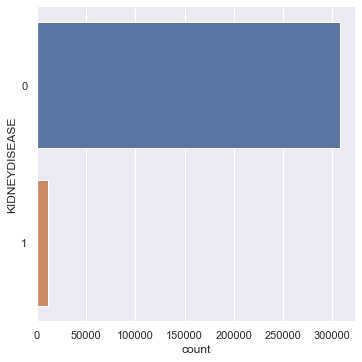

In [140]:
string='KIDNEYDISEASE'
uniBinAnalysis(string,df,"Has "+string,"Dont have "+string)

Ratio of classes is 
 Has Skin Cancer  :  Dont have Skin Cancer  =
 289976 : 29819


<Figure size 1152x576 with 0 Axes>

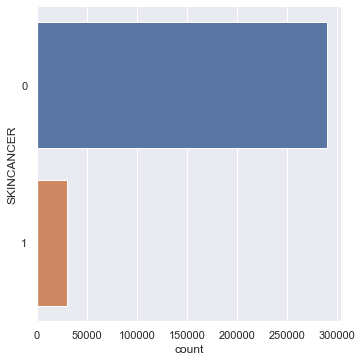

In [141]:
uniBinAnalysis('SKINCANCER',df,"Has Skin Cancer","Dont have Skin Cancer")

## Numeric Predictor Variables

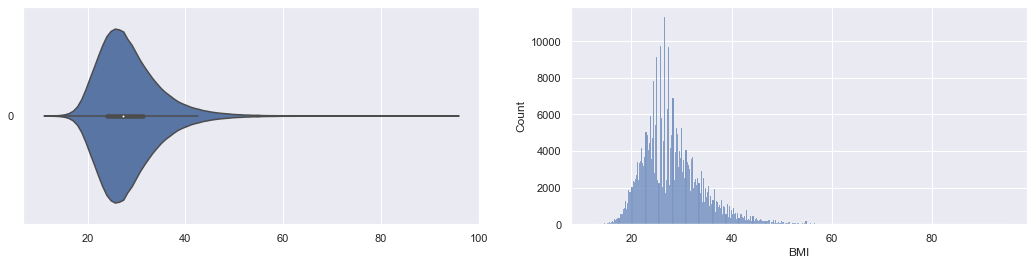

In [142]:
uniNumAnalysis('BMI',df)

Slightly positively skewed, most of the data seems to be concentrated between 20 and 40

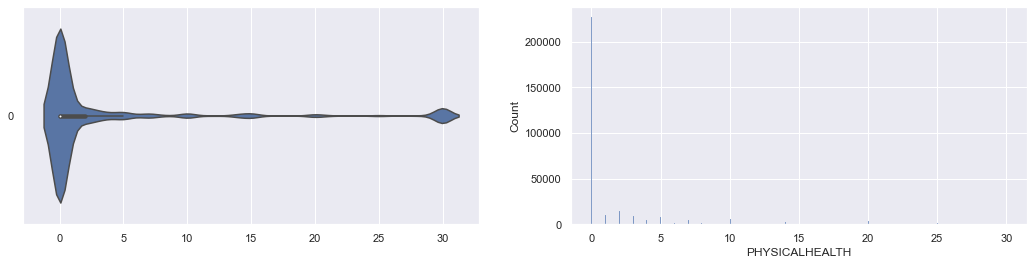

In [143]:
uniNumAnalysis('PHYSICALHEALTH',df)

Heavily positively skewed. Most of the data is at "PHYSICALHEALTH" = 0, there is a small peak at "PHYSICALHEALTH" = 30

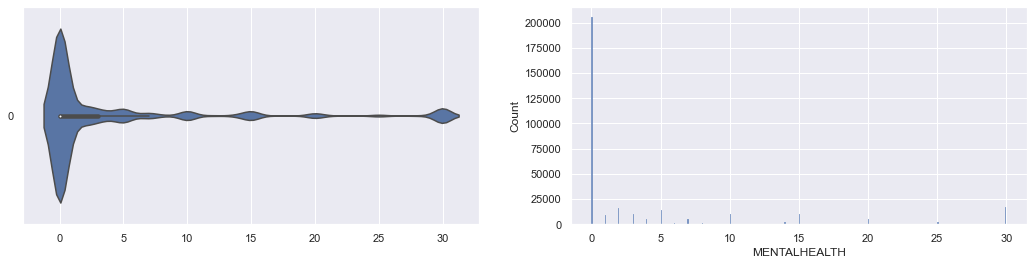

In [144]:
uniNumAnalysis('MENTALHEALTH',df)

Heavily positively skewed. Most of the data is at "MENTALHEALTH" = 0, there is a small peak at "MENTALHEALTh" = 30

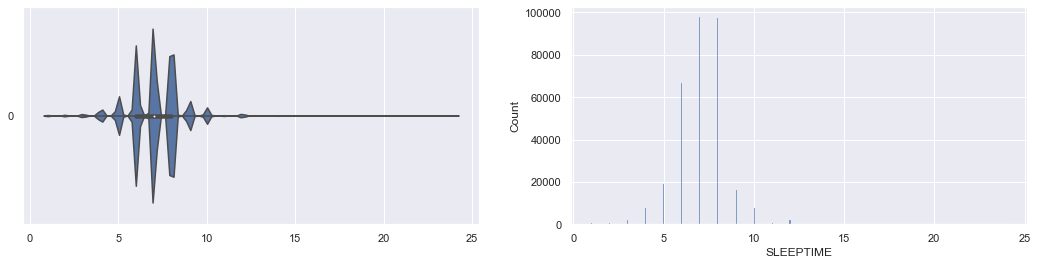

In [145]:
uniNumAnalysis('SLEEPTIME',df)

# Bivariate Exploration

In [146]:
# Helper functions


# Do binaray analysis between a categoric variable and response variable, "HEARTDISEASE"
# Heatmap of number of people under different conditions are displayed
# Then a grouped bar chart is displayed for better visualization of difference between people have and dont have heart disease
def biCatAnalysis(strY,dataFrame):
    print(strY+" against HEARTDISEASE")
    f = plt.figure(figsize=(16,8))
    sb.heatmap(dataFrame.groupby(['HEARTDISEASE', strY]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
    f = plt.figure(figsize=(16,8))
    sb.countplot(y=strY,hue='HEARTDISEASE',data=dataFrame)    


In [147]:
#Print the list of probability of having heart disease when variable = 0 and variable = 1
#return list of probability
def returnListOfProbability(strY,dataframe,state1,state2):
    prob = []
    df0 = dataframe[dataframe[strY]==0]
    df1 = dataframe[dataframe[strY]==1]
    prob.append(sum(df0['HEARTDISEASE']==1) / df0[strY].count())
    prob.append(sum(df1['HEARTDISEASE']==1) / df1[strY].count())
    print(state1,": Probability of have Heart Disease:",prob[0])
    print(state2,": Probability of have Heart Disease:",prob[1])
    return prob

## Relationship between categorical predictors against respond variable "HEARTDISEASE"

SEX against HEARTDISEASE
Female : Probability of have Heart Disease: 0.06694675367241738
Male : Probability of have Heart Disease: 0.10618461740904007


[Text(0.5, 0, 'SEX'), Text(0, 0.5, 'Probability of getting heart disease')]

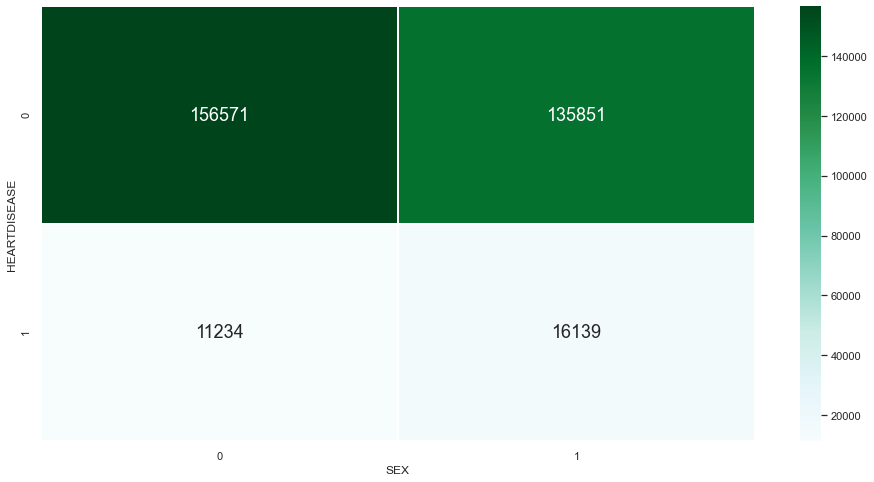

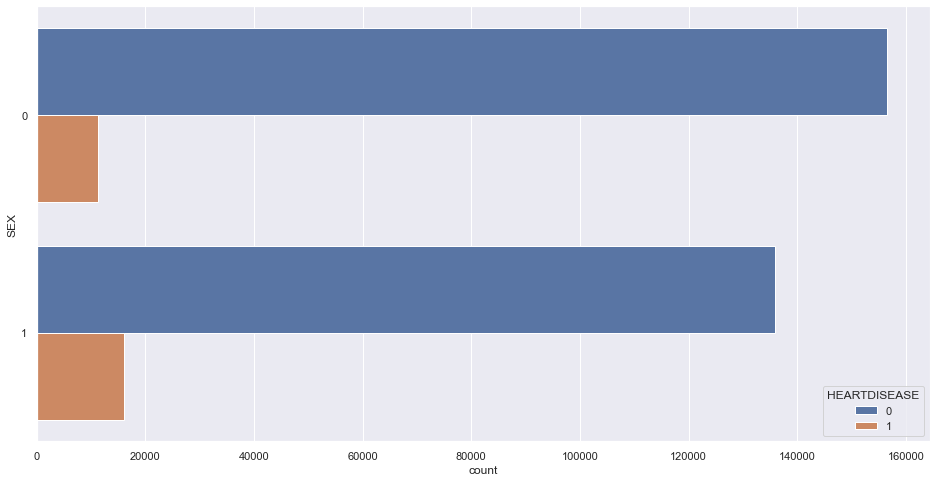

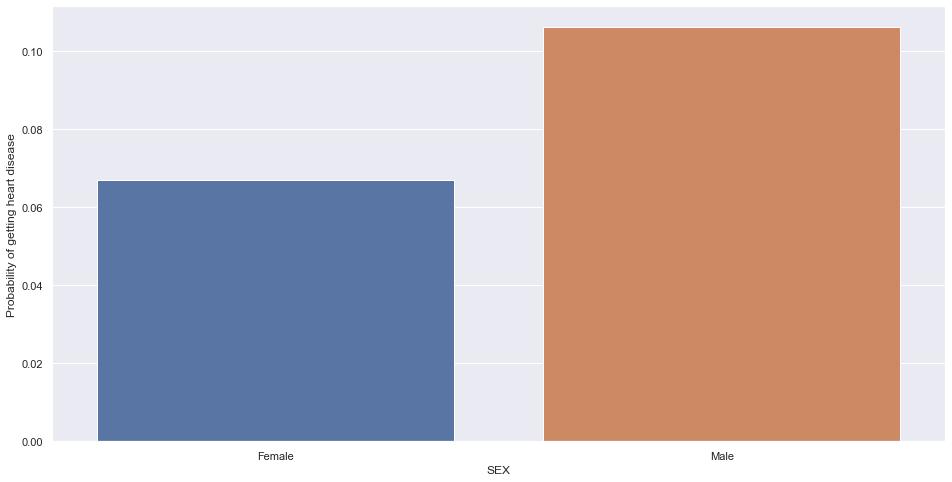

In [148]:
string = "SEX"
biCatAnalysis(string,df)
prob = []
prob.extend(returnListOfProbability(string,df,"Female","Male"))

labels = ["Female","Male"]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=string,ylabel="Probability of getting heart disease")

There does exist difference between probability of Male having heart disease and probability of Female having heart disease.

Therefore, "SEX" may be a possible predictor

SMOKING against HEARTDISEASE
Dont Have SMOKING : Probability of have Heart Disease: 0.0603341370078824
Has SMOKING : Probability of have Heart Disease: 0.12157715983867544


[Text(0.5, 0, 'SMOKING'), Text(0, 0.5, 'Probability of getting heart disease')]

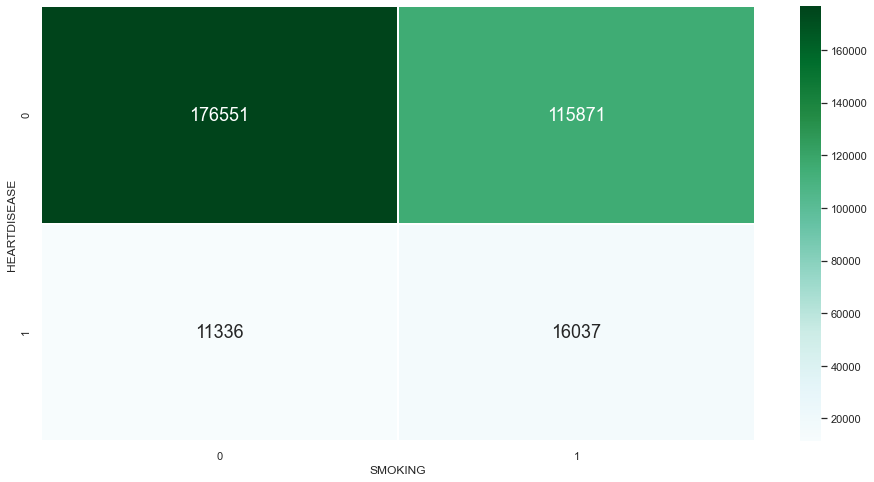

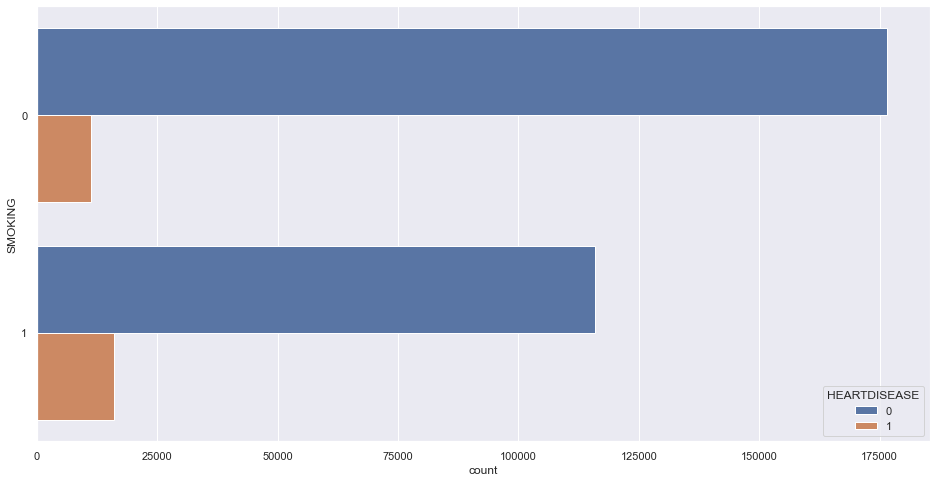

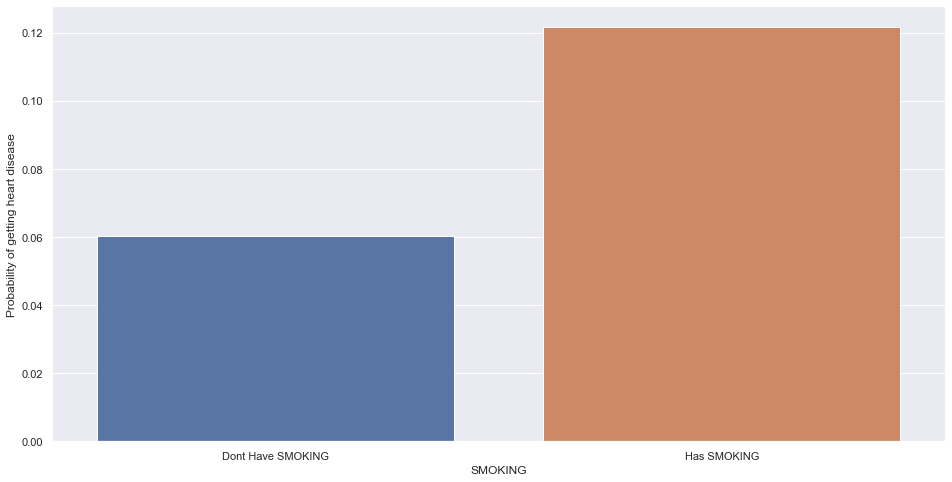

In [149]:
strY = catPredictorList[0]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Dont Have "+strY,"Has "+strY))

labels = ["Dont Have "+strY,"Has "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting heart disease")

Probability Smokers having heart disease is higher than non-smokers

Therefore, "SMOKING can be a possible predictors

ALCOHOLDRINKING against HEARTDISEASE
Dont Have ALCOHOLDRINKING : Probability of have Heart Disease: 0.08802152890093887
Has ALCOHOLDRINKING : Probability of have Heart Disease: 0.05239472838315654


[Text(0.5, 0, 'ALCOHOLDRINKING'),
 Text(0, 0.5, 'Probability of getting heart disease')]

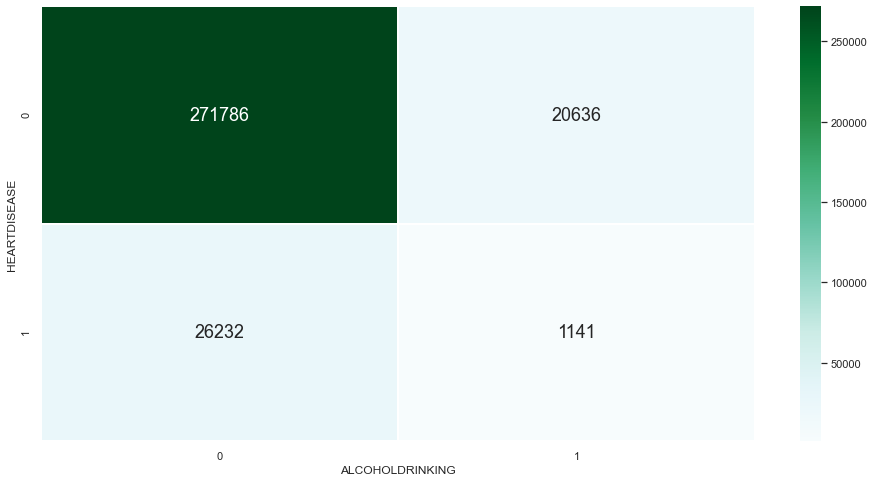

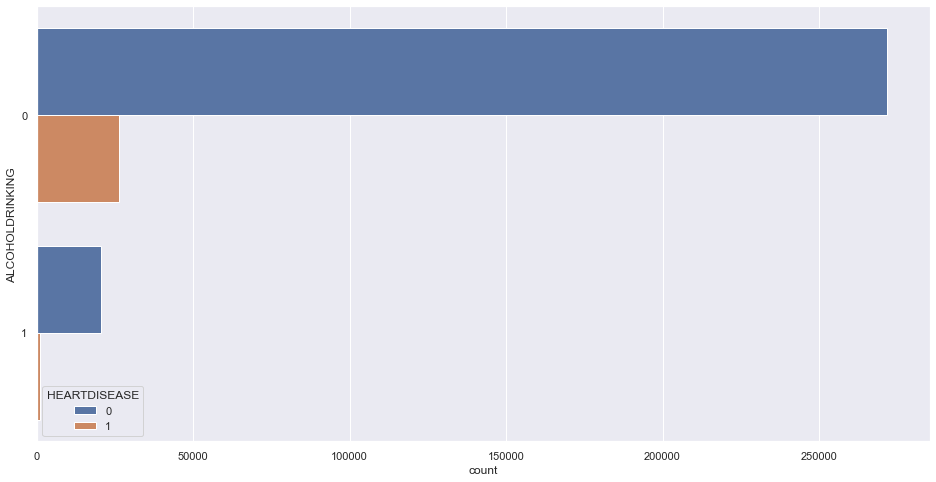

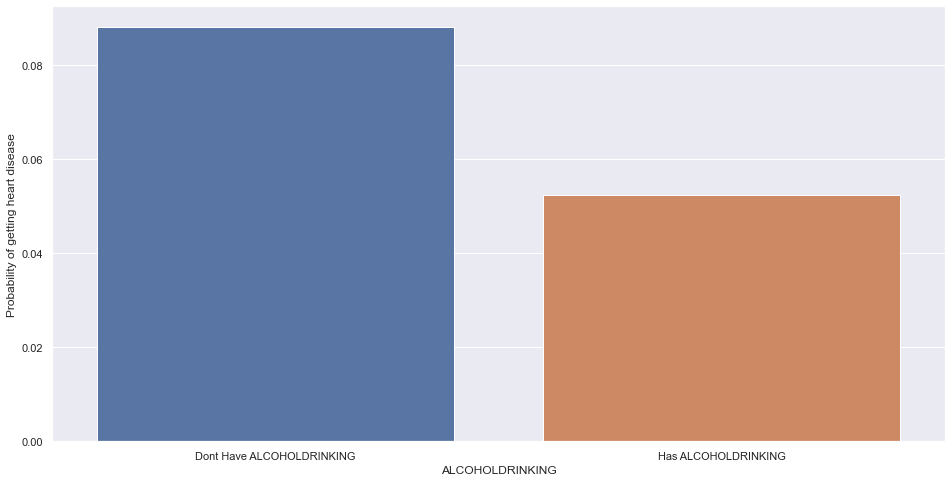

In [150]:
strY = catPredictorList[1]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Dont Have "+strY,"Has "+strY))

labels = ["Dont Have "+strY,"Has "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting heart disease")

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 0.0856

People who dont have alcohol drinking, the probability of having heart disease is 0.0888

There is no significant difference between these two data, therefore alcohol drinking is not a good predictor

STROKE against HEARTDISEASE
Dont Have STROKE : Probability of have Heart Disease: 0.07468982146454964
Has STROKE : Probability of have Heart Disease: 0.3636589609743972


[Text(0.5, 0, 'STROKE'), Text(0, 0.5, 'Probability of getting heart disease')]

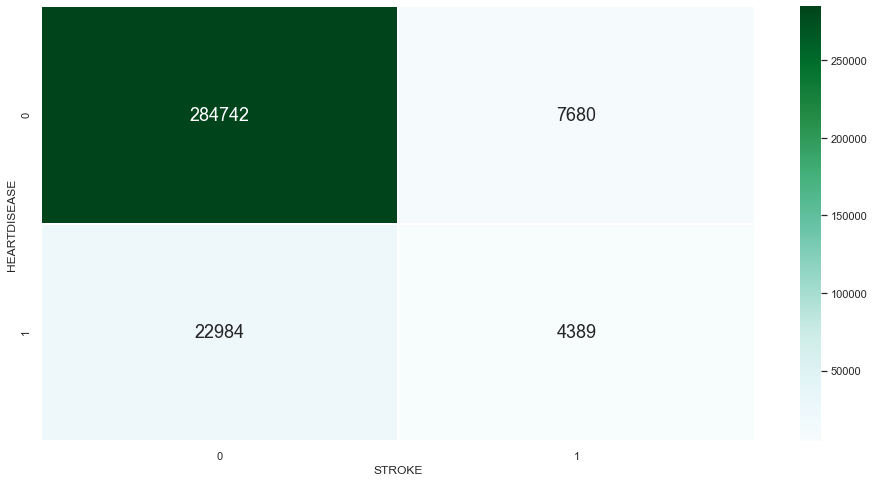

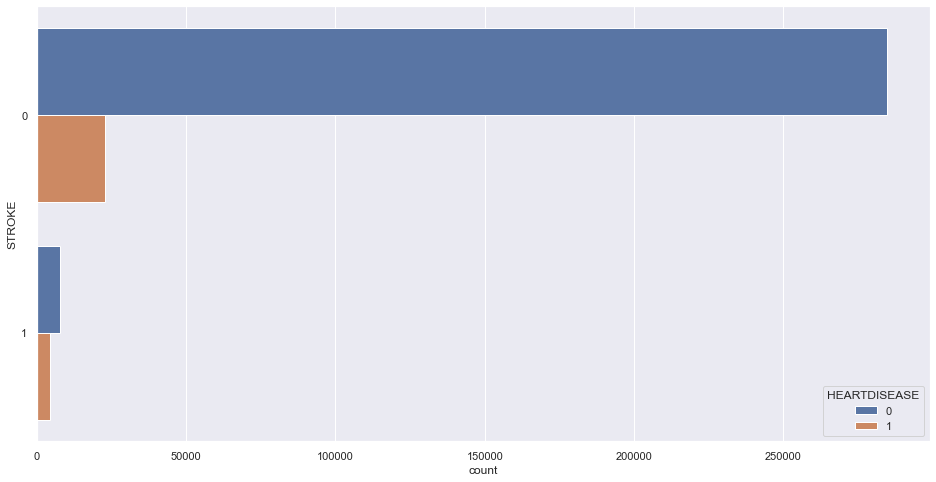

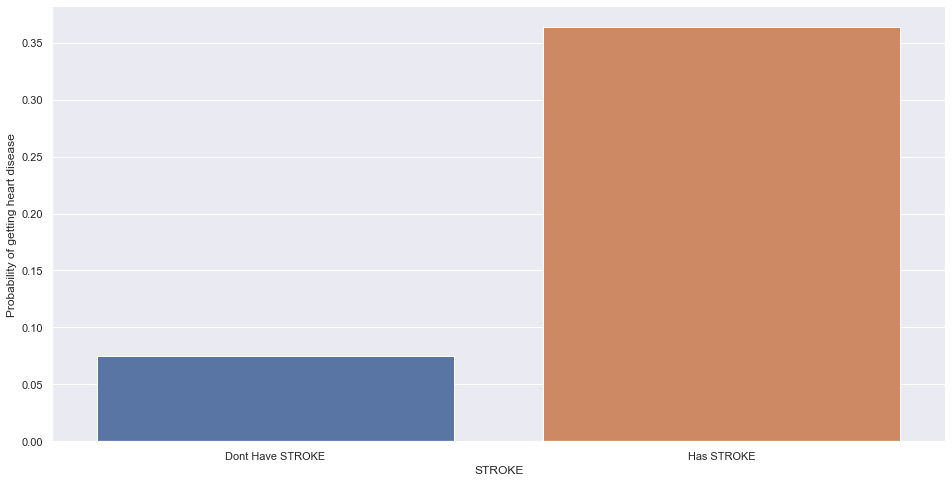

In [151]:
strY = catPredictorList[2]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Dont Have "+strY,"Has "+strY))

labels = ["Dont Have "+strY,"Has "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting heart disease")

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

There probability of Stroke having heart disease is 36.4%

Stroke is a good predictors of heart disease

DIFFWALKING against HEARTDISEASE
Dont Have DIFFWALKING : Probability of have Heart Disease: 0.0629845489042613
Has DIFFWALKING : Probability of have Heart Disease: 0.22580499887412744


[Text(0.5, 0, 'DIFFWALKING'),
 Text(0, 0.5, 'Probability of getting heart disease')]

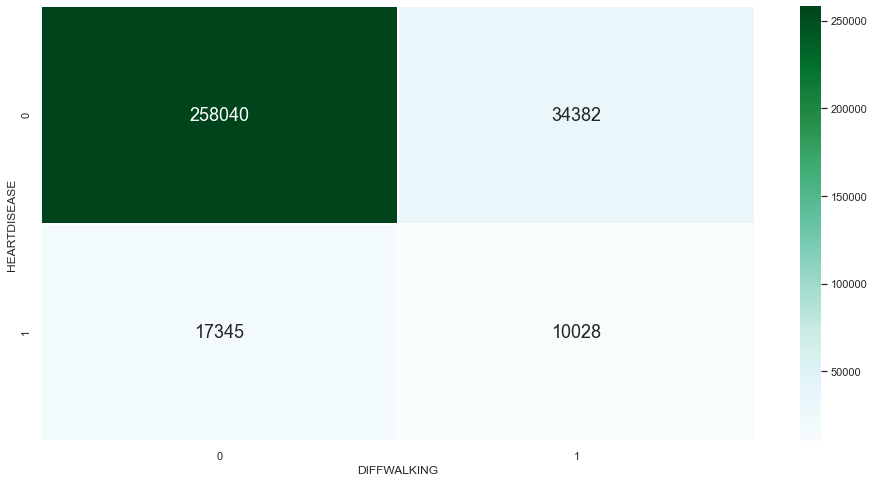

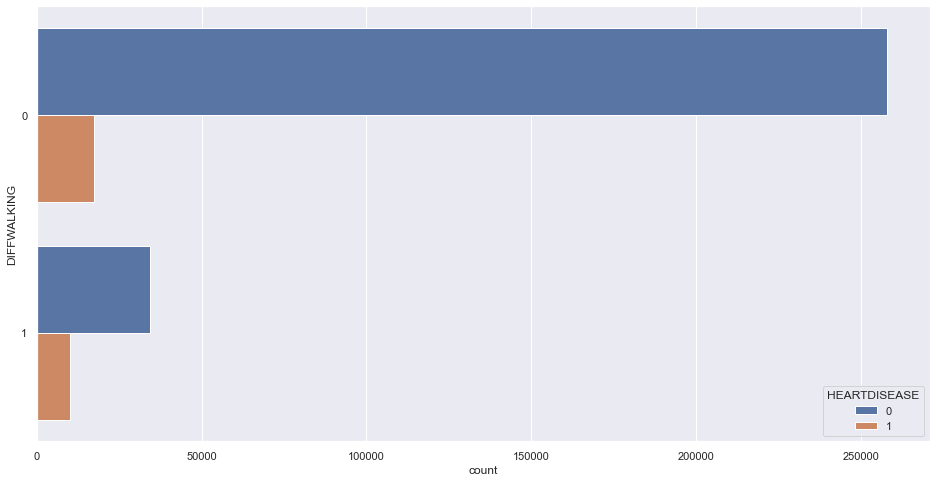

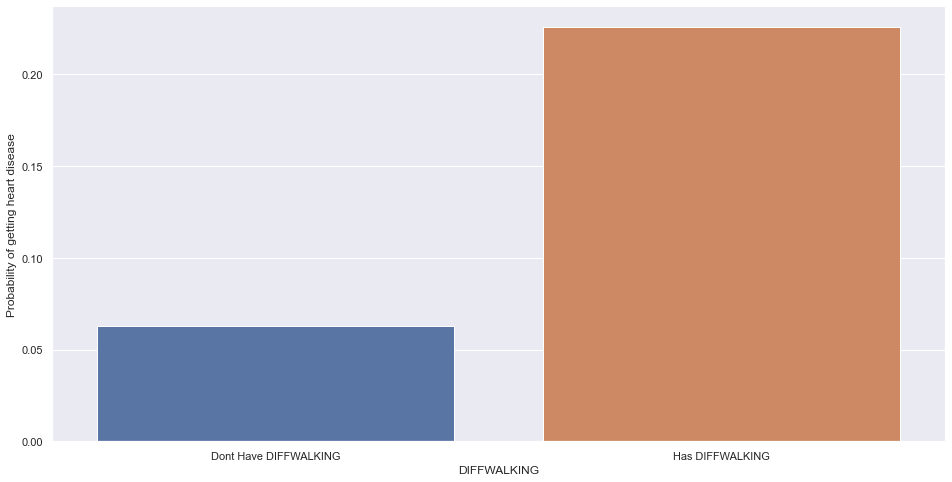

In [152]:
strY = catPredictorList[3]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Dont Have "+strY,"Has "+strY))

labels = ["Dont Have "+strY,"Has "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting heart disease")

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

There probability of DIFFWALKING having heart disease is 22.6%

DIFFWALKING is a good predictors of heart disease

SEX against HEARTDISEASE
18-24 : Probability of have Heart Disease: 0.006171667299658184
25-29 : Probability of have Heart Disease: 0.00784429371866706
30-34 : Probability of have Heart Disease: 0.01205140510851597
35-39 : Probability of have Heart Disease: 0.01440389294403893
40-44 : Probability of have Heart Disease: 0.02313624678663239
45-49 : Probability of have Heart Disease: 0.034142535909320364
50-54 : Probability of have Heart Disease: 0.054487432038452445
55-59 : Probability of have Heart Disease: 0.07399939510031253
60-64 : Probability of have Heart Disease: 0.09876506560588968
65-69 : Probability of have Heart Disease: 0.12008433135193698
70-74 : Probability of have Heart Disease: 0.15602768388862062
75-79 : Probability of have Heart Disease: 0.18848338143562052
80 or older : Probability of have Heart Disease: 0.2256034447066617


[Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Probability of getting heart disease')]

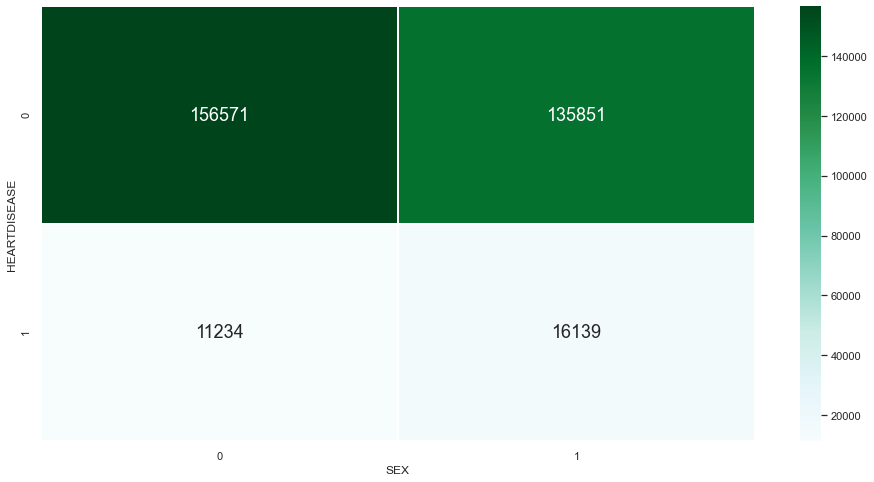

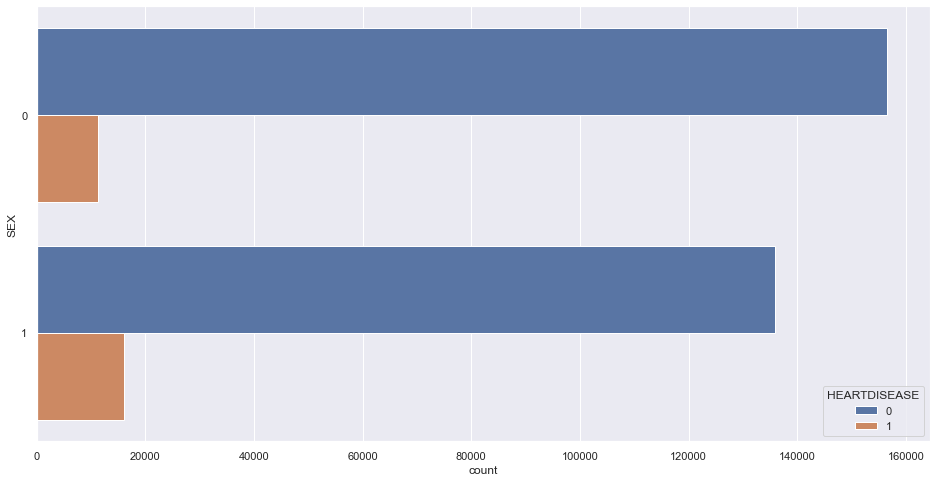

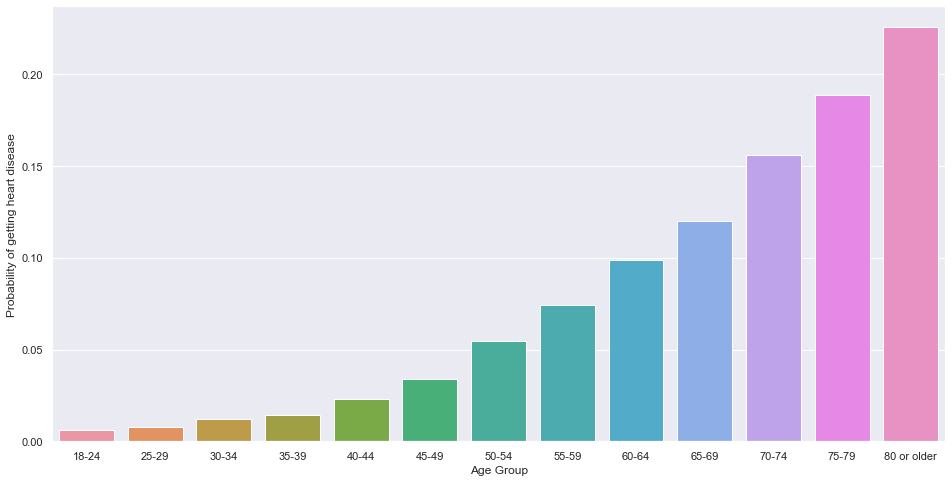

In [153]:
strY = catPredictorList[5]
biCatAnalysis(string,df)
df0 = df[df[strY]=='18-24']
df1 = df[df[strY]=='25-29']
df2 = df[df[strY]=='30-34']
df3 = df[df[strY]=='35-39']
df4 = df[df[strY]=='40-44']
df5 = df[df[strY]=='45-49']
df6 = df[df[strY]=='50-54']
df7 = df[df[strY]=='55-59']
df8 = df[df[strY]=='60-64']
df9 = df[df[strY]=='65-69']
df10 = df[df[strY]=='70-74']
df11 = df[df[strY]=='75-79']
df12 =  df[df[strY]=='80 or older']

############
labels = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']

y1 = [sum(df0['HEARTDISEASE']==0), sum(df1['HEARTDISEASE']==0),
      sum(df2['HEARTDISEASE']==0), sum(df3['HEARTDISEASE']==0),
      sum(df4['HEARTDISEASE']==0), sum(df5['HEARTDISEASE']==0),
      sum(df6['HEARTDISEASE']==0),sum(df7['HEARTDISEASE']==0),
     sum(df8['HEARTDISEASE']==0),sum(df9['HEARTDISEASE']==0),
     sum(df10['HEARTDISEASE']==0),sum(df11['HEARTDISEASE']==0),
     sum(df12['HEARTDISEASE']==0)]

y2 = [sum(df0['HEARTDISEASE']==1), sum(df1['HEARTDISEASE']==1),
      sum(df2['HEARTDISEASE']==1), sum(df3['HEARTDISEASE']==1),
      sum(df4['HEARTDISEASE']==1), sum(df5['HEARTDISEASE']==1),
      sum(df6['HEARTDISEASE']==1),sum(df7['HEARTDISEASE']==1),
     sum(df8['HEARTDISEASE']==1),sum(df9['HEARTDISEASE']==1),
     sum(df10['HEARTDISEASE']==1),sum(df11['HEARTDISEASE']==1),
     sum(df12['HEARTDISEASE']==1)]

y3 = [-sum(df0['HEARTDISEASE']==1), -sum(df1['HEARTDISEASE']==1),
      -sum(df2['HEARTDISEASE']==1), -sum(df3['HEARTDISEASE']==1),
      -sum(df4['HEARTDISEASE']==1), -sum(df5['HEARTDISEASE']==1),
      -sum(df6['HEARTDISEASE']==1),-sum(df7['HEARTDISEASE']==1),
     -sum(df8['HEARTDISEASE']==1),-sum(df9['HEARTDISEASE']==1),
     -sum(df10['HEARTDISEASE']==1),-sum(df11['HEARTDISEASE']==1),
     -sum(df12['HEARTDISEASE']==1)]
probability = []
for i in range(len(y1)):
    probability.append(y2[i]/(y1[i]+y2[i]))
    print(labels[i],": Probability of have Heart Disease:",probability[i])

f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=probability)
ax.set(xlabel="Age Group",ylabel="Probability of getting heart disease")

According to the chart, the probability of having heart disease increases significantly as age get older

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

There probability of 80+ old people having heart disease is 22.6%

Probability of having heart disease is significantly lower than 8.56% between 18 and 50 (3.4%)

Probability of having heart disease is significantly higher than 8.56% above 65 (12%)

RACE against HEARTDISEASE
White : Probability of have Heart Disease: 0.09178588323573071
Black : Probability of have Heart Disease: 0.07537381751602075
Hispanic : Probability of have Heart Disease: 0.052575967354077095
Asian : Probability of have Heart Disease: 0.032969757064947945
American Indian/Alaskan Native : Probability of have Heart Disease: 0.10419069588619762
Other : Probability of have Heart Disease: 0.08107613469985359


Text(0, 0.5, 'Probability of getting heart disease')

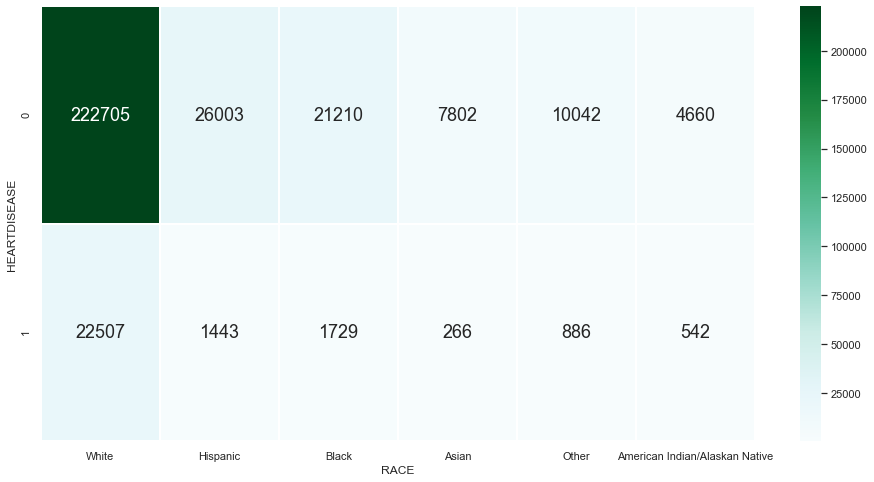

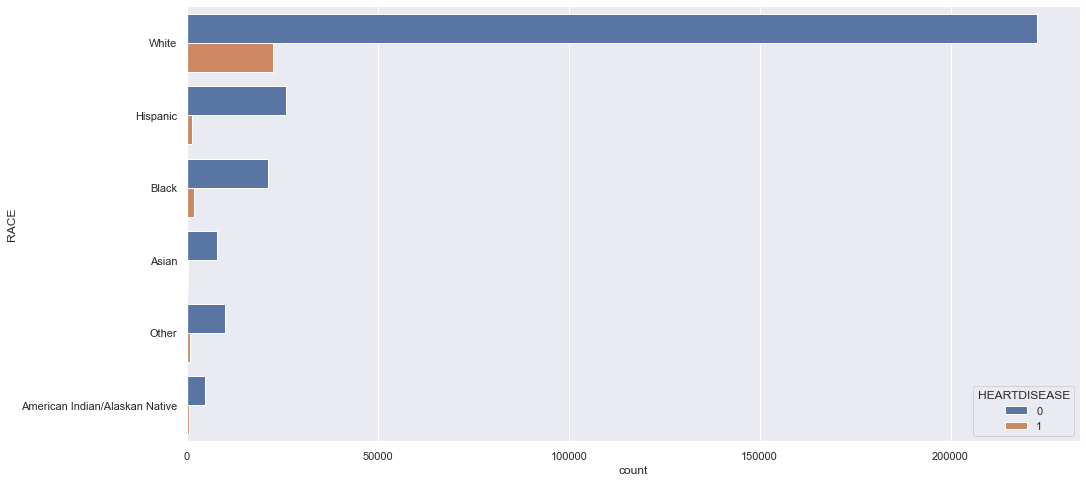

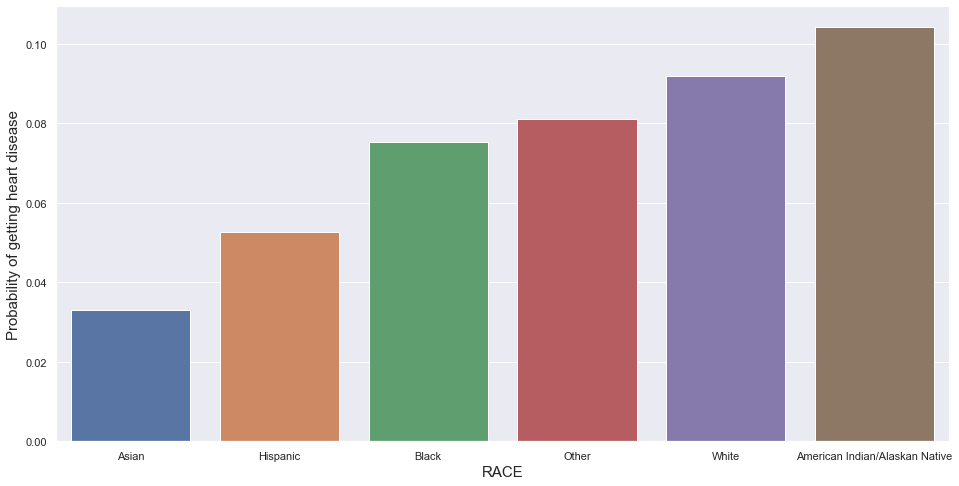

In [154]:
strY = catPredictorList[6]
biCatAnalysis(strY,df)
df0 = df[df[strY]=='White']
df1 = df[df[strY]=='Black']
df2 = df[df[strY]=='Hispanic']
df3 = df[df[strY]=='Asian']
df4 = df[df[strY]=='American Indian/Alaskan Native']
df5 = df[df[strY]=='Other']

############
labels = ['White','Black','Hispanic','Asian','American Indian/Alaskan Native','Other']

y1 = [sum(df0['HEARTDISEASE']==0), sum(df1['HEARTDISEASE']==0),
      sum(df2['HEARTDISEASE']==0), sum(df3['HEARTDISEASE']==0),
      sum(df4['HEARTDISEASE']==0),sum(df5['HEARTDISEASE']==0)]

y2 = [sum(df0['HEARTDISEASE']==1), sum(df1['HEARTDISEASE']==1),
      sum(df2['HEARTDISEASE']==1), sum(df3['HEARTDISEASE']==1),
      sum(df4['HEARTDISEASE']==1),sum(df5['HEARTDISEASE']==1)]

y3 = [-sum(df0['HEARTDISEASE']==1), -sum(df1['HEARTDISEASE']==1),
      -sum(df2['HEARTDISEASE']==1), -sum(df3['HEARTDISEASE']==1),
      -sum(df4['HEARTDISEASE']==1),-sum(df5['HEARTDISEASE']==1)]
probability = []
for i in range(len(y1)):
    print(labels[i],": Probability of have Heart Disease:",y2[i]/(y1[i]+y2[i]))
    probability.append(y2[i]/(y1[i]+y2[i]))

df_temp = pd.DataFrame({"labels": labels,
                   "prob": probability})
f = plt.figure(figsize=(16,8))
sb.barplot(x='labels',y='prob',data = df_temp, order=df_temp.sort_values('prob').labels)

plt.xlabel(strY, size=15)
plt.ylabel("Probability of getting heart disease", size=15)

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

Race is possibly a predictors if Race == American Indian/Alaskan Native (10.4%) , or Race == Asian (3.3%)

DIABETIC against HEARTDISEASE
Dont Have DIABETIC : Probability of have Heart Disease: 0.06622919033114595
Has DIABETIC : Probability of have Heart Disease: 0.20905883166901132


[Text(0.5, 0, 'DIABETIC'),
 Text(0, 0.5, 'Probability of getting heart disease')]

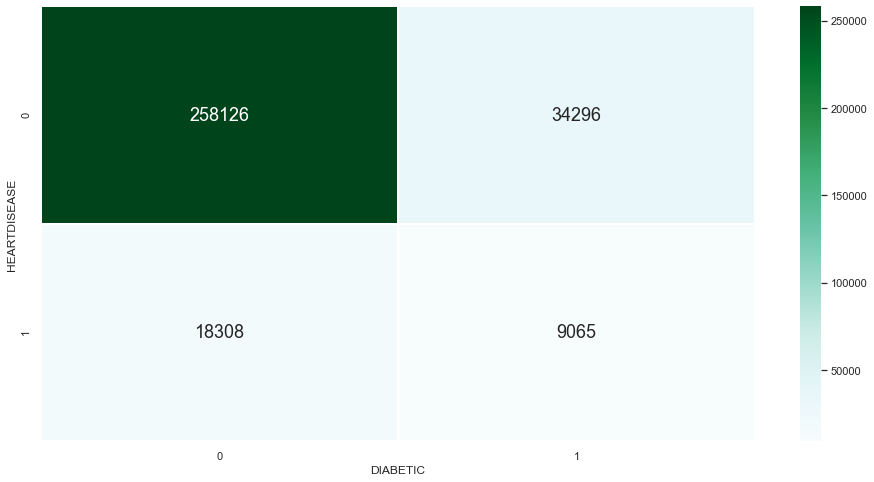

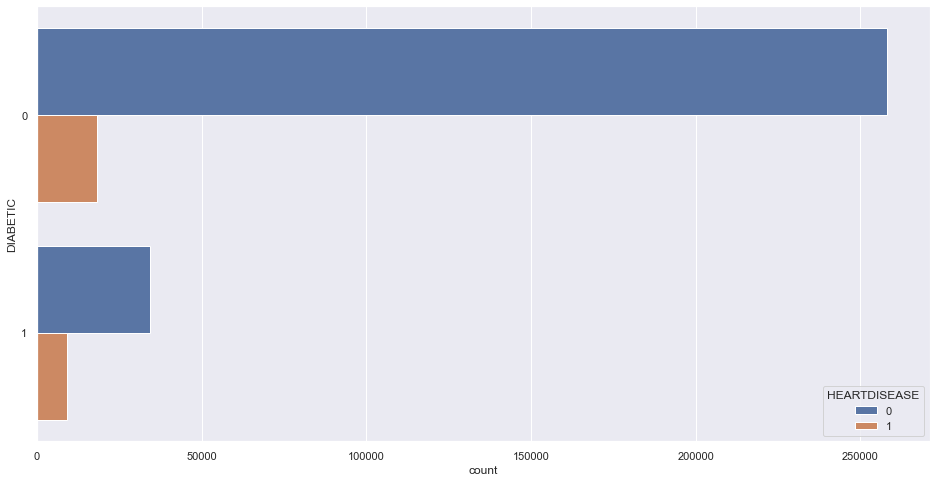

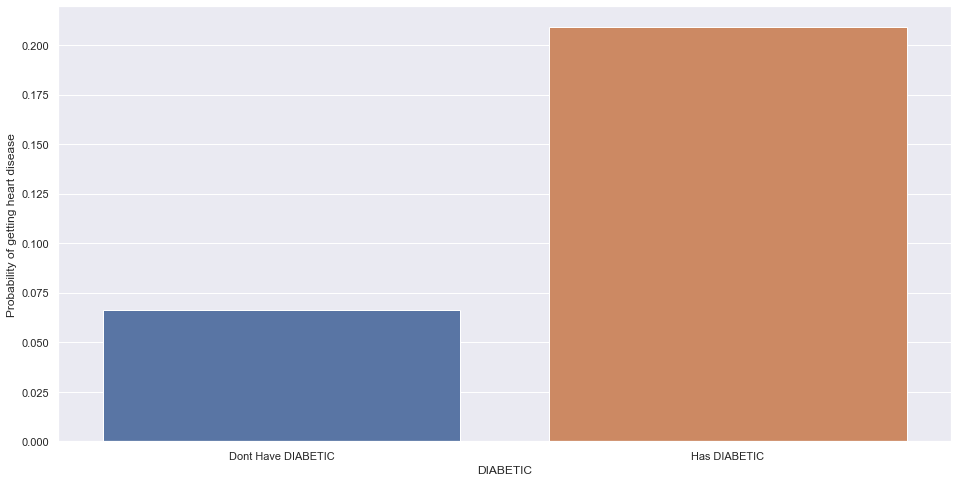

In [155]:
strY = catPredictorList[7]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Dont Have "+strY,"Has "+strY))

labels = ["Dont Have "+strY,"Has "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting heart disease")

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

Probability of having heart disease is significantly higher (20.9%) if the person has diabetic

Therefore, diabetic is a good predictor

GENHEALTH against HEARTDISEASE
Poor : Probability of have Heart Disease: 0.34103995039418905
Fair : Probability of have Heart Disease: 0.204285261124088
Good : Probability of have Heart Disease: 0.10263183326353767
Very good : Probability of have Heart Disease: 0.04726062288113264
Excellent : Probability of have Heart Disease: 0.0224409802220161


Text(0, 0.5, 'Probability of getting heart disease')

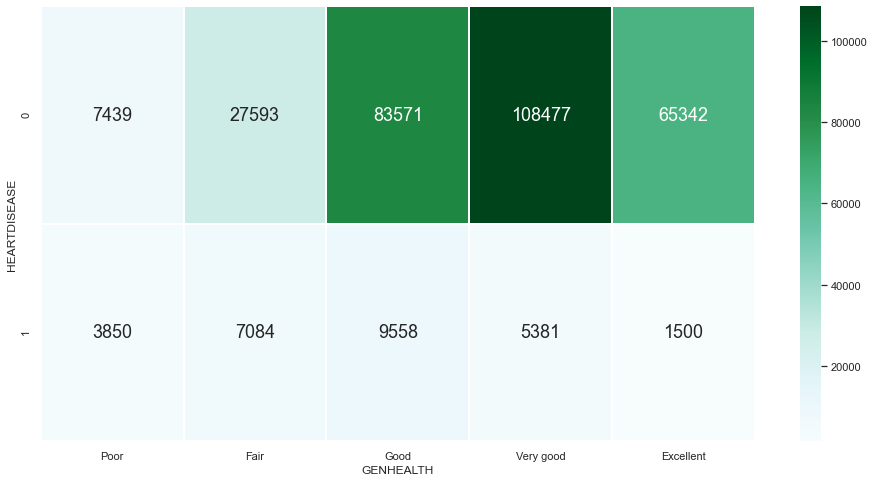

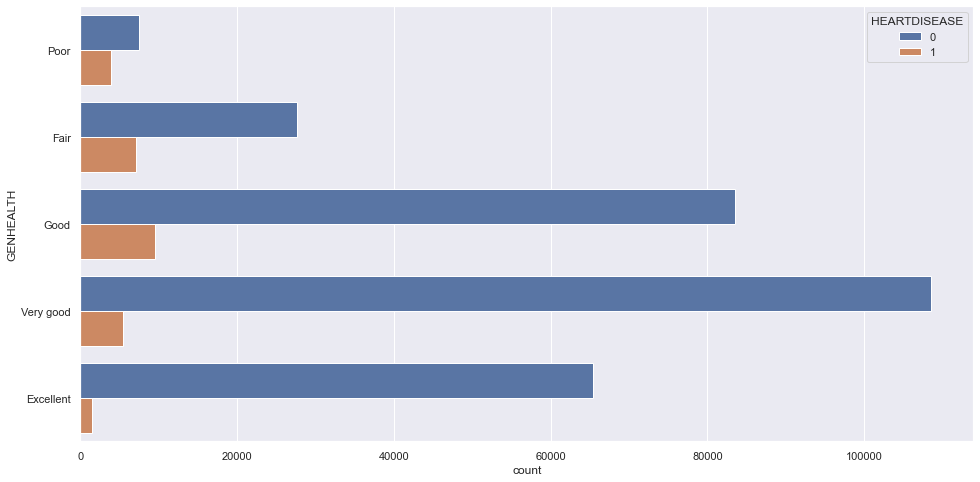

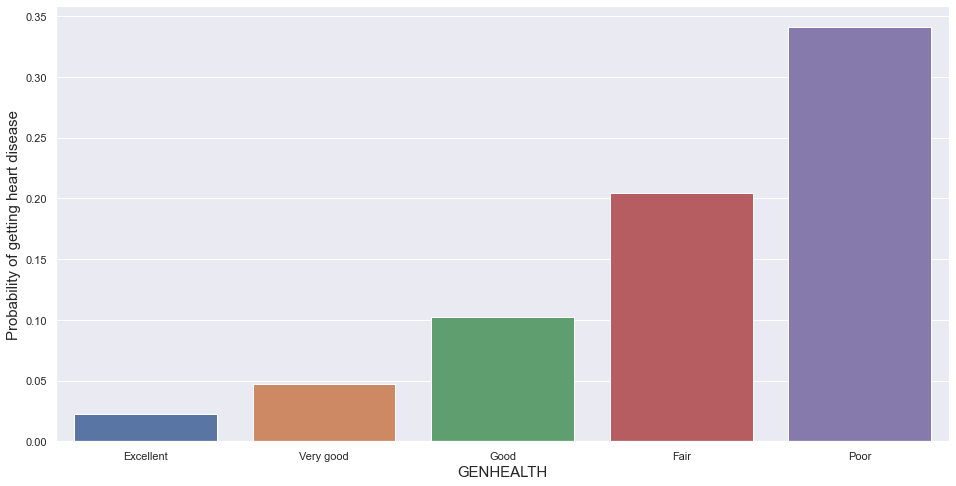

In [156]:
strY = catPredictorList[8]
biCatAnalysis(strY,df)
df0 = df[df[strY]=='Poor']
df1 = df[df[strY]=='Fair']
df2 = df[df[strY]=='Good']
df3 = df[df[strY]=='Very good']
df4 = df[df[strY]=='Excellent']


############
labels = ['Poor','Fair',"Good","Very good",'Excellent']

y1 = [sum(df0['HEARTDISEASE']==0), sum(df1['HEARTDISEASE']==0),
      sum(df2['HEARTDISEASE']==0), sum(df3['HEARTDISEASE']==0),
      sum(df4['HEARTDISEASE']==0)]

y2 = [sum(df0['HEARTDISEASE']==1), sum(df1['HEARTDISEASE']==1),
      sum(df2['HEARTDISEASE']==1), sum(df3['HEARTDISEASE']==1),
      sum(df4['HEARTDISEASE']==1)]

y3 = [-sum(df0['HEARTDISEASE']==1), -sum(df1['HEARTDISEASE']==1),
      -sum(df2['HEARTDISEASE']==1), -sum(df3['HEARTDISEASE']==1),
      -sum(df4['HEARTDISEASE']==1)]

probability = []
for i in range(len(y1)):
    print(labels[i],": Probability of have Heart Disease:",y2[i]/(y1[i]+y2[i]))
    probability.append(y2[i]/(y1[i]+y2[i]))

df_temp = pd.DataFrame({"labels": labels,
                   "prob": probability})
f = plt.figure(figsize=(16,8))
sb.barplot(x='labels',y='prob',data = df_temp, order=df_temp.sort_values('prob').labels)

plt.xlabel(strY, size=15)
plt.ylabel("Probability of getting heart disease", size=15)

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

GENHEALTH is a good predictors as probability of having heart disease is significantly high when GENHEALTH = Fair/Poor

and significantly low when GENHEALTH = Excellent

ASTHMA against HEARTDISEASE
Dont Have ASTHMA : Probability of have Heart Disease: 0.08103335584259884
Has ASTHMA : Probability of have Heart Disease: 0.11506344467251353


[Text(0.5, 0, 'ASTHMA'), Text(0, 0.5, 'Probability of getting heart disease')]

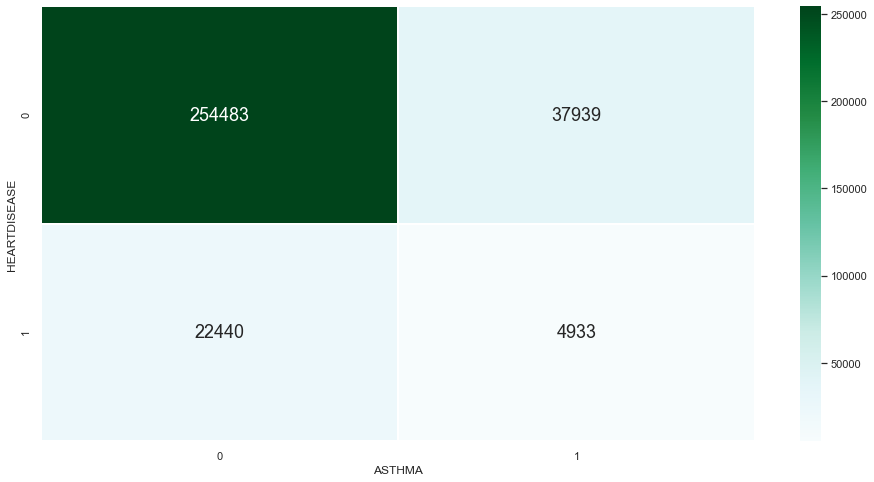

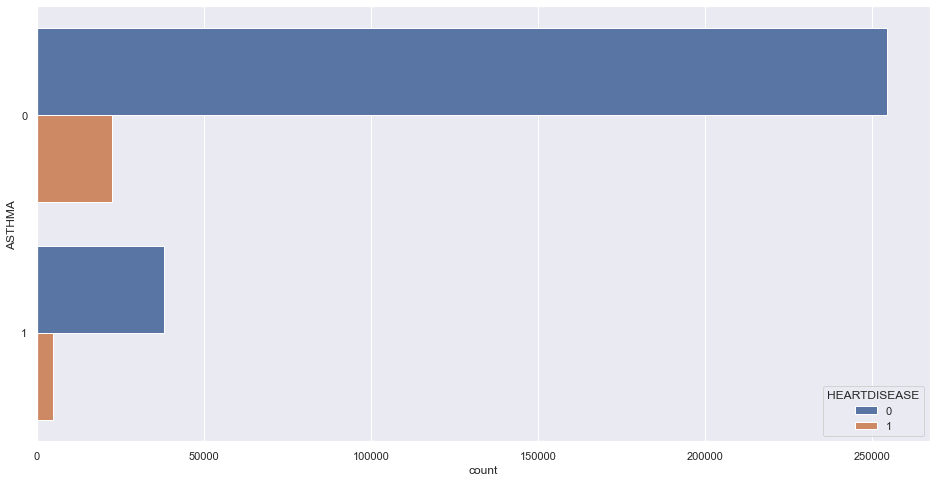

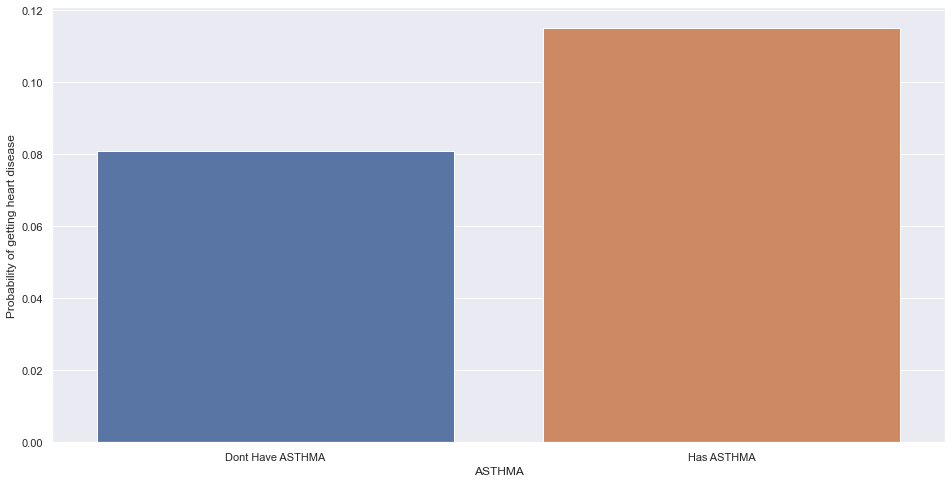

In [157]:
strY = catPredictorList[9]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Dont Have "+strY,"Has "+strY))

labels = ["Dont Have "+strY,"Has "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting heart disease")

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

Asthma could be a possible predictor as probability of having heart disease is 11.5% higher than 8.56%

KIDNEYDISEASE against HEARTDISEASE
Dont Have KIDNEYDISEASE : Probability of have Heart Disease: 0.07765181029556906
Has KIDNEYDISEASE : Probability of have Heart Disease: 0.29331861787927666


[Text(0.5, 0, 'KIDNEYDISEASE'),
 Text(0, 0.5, 'Probability of getting heart disease')]

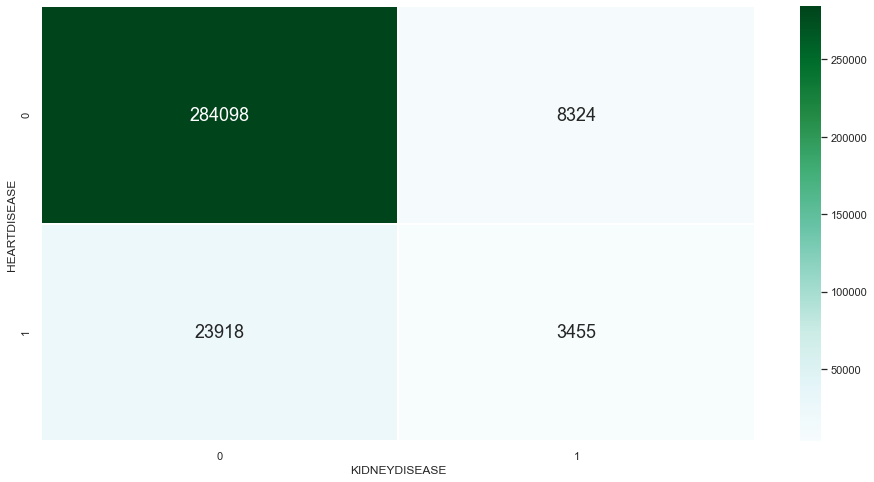

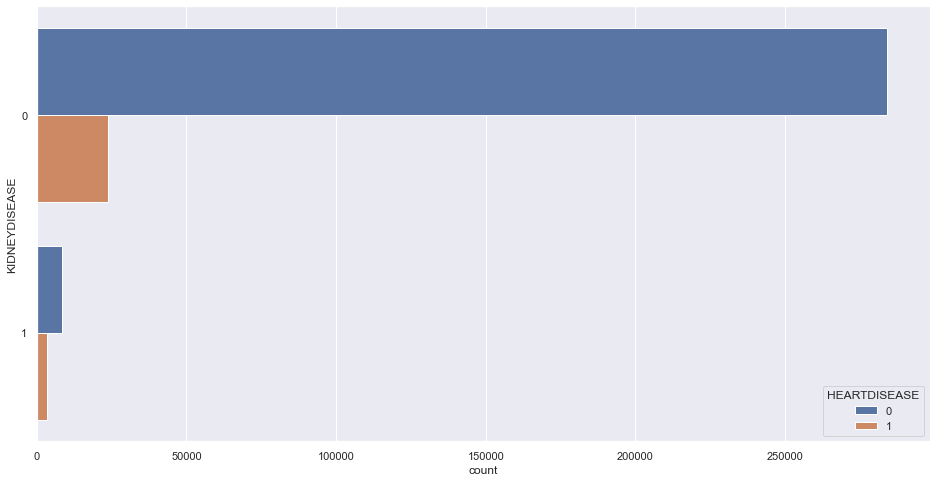

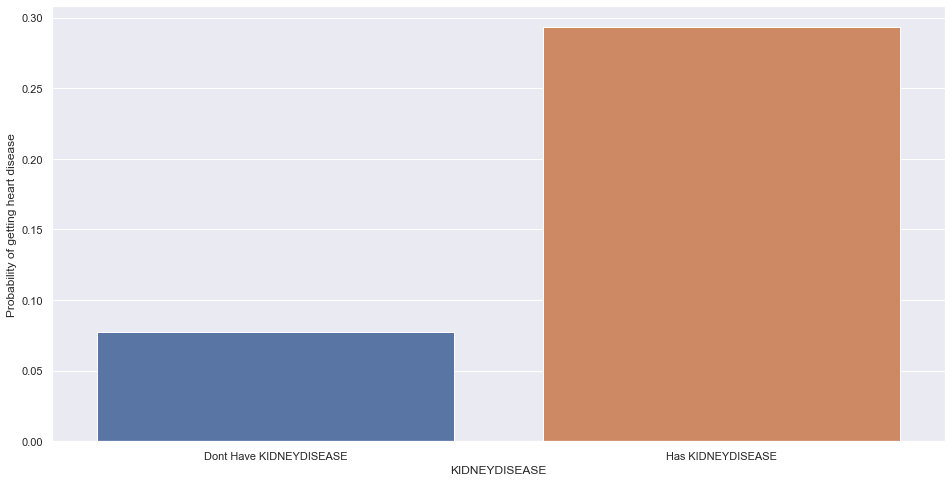

In [158]:
strY = catPredictorList[10]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Dont Have "+strY,"Has "+strY))

labels = ["Dont Have "+strY,"Has "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting heart disease")

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

Kidney disease is a good predictor as it has significantly high probability of having heart disease if the person has heart disease too

SKINCANCER against HEARTDISEASE
Dont Have SKINCANCER : Probability of have Heart Disease: 0.0772236323006042
Has SKINCANCER : Probability of have Heart Disease: 0.16700761259599584


[Text(0.5, 0, 'SKINCANCER'),
 Text(0, 0.5, 'Probability of getting heart disease')]

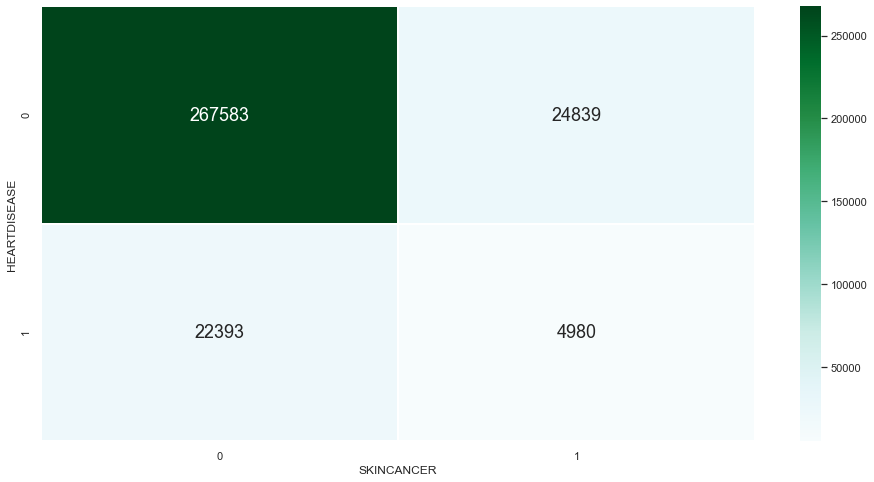

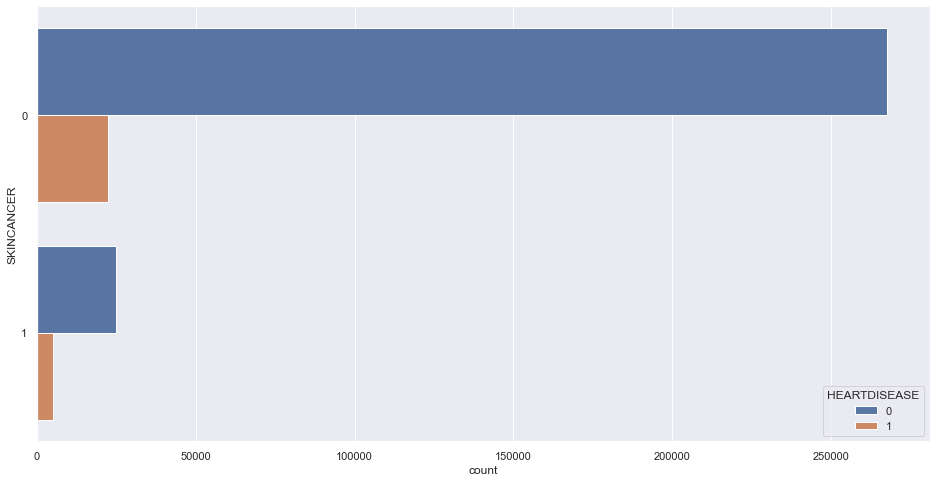

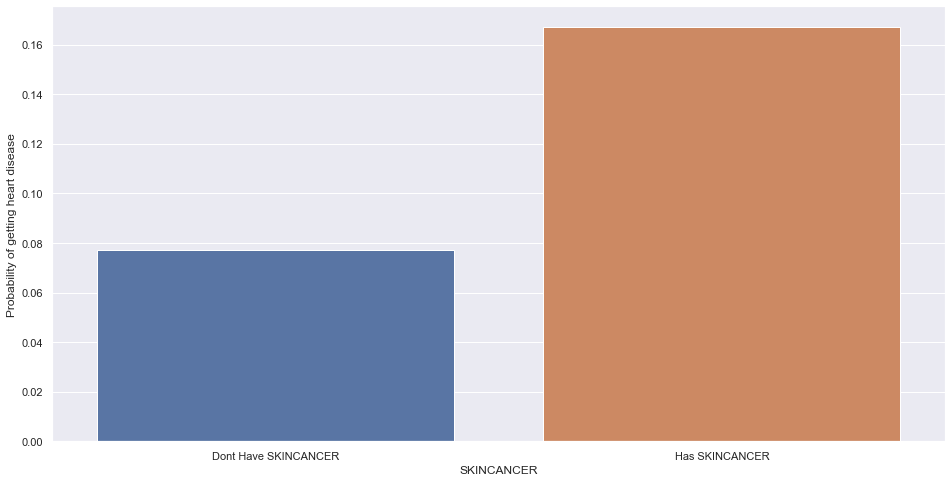

In [159]:
strY = catPredictorList[11]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Dont Have "+strY,"Has "+strY))

labels = ["Dont Have "+strY,"Has "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting heart disease")

According to the cardinality of "HEARTDISEASE", probability of having heart disease is 8.56%

Skincancer could be a predictor as its probability of having heart disease if has skincancer is 16.7%

Overall, We found that AGEGROUP, STROKE, DIFFWALKING,DIABETIC, GENHEALTH, KIDNEYDISEASE,and SKINCANCER are good predictors of HEARTDISEASE

## Relationship between Numerical Predictors against respond variable "HEARTDISEASE"

In [160]:
def biNumAnalysis(strY,df):
    f = plt.figure(figsize=(16, 8))
    sb.boxplot(x = 'HEARTDISEASE',y = strY, data = df)

    f = plt.figure(figsize=(16, 8))
    sb.stripplot(x = 'HEARTDISEASE',y = strY, data = df)

    f = plt.figure(figsize=(16, 8))
    sb.violinplot(x = 'HEARTDISEASE',y = strY, data = df)
    
    f, ax = plt.subplots(figsize=(16, 8))
    plt.title('Distribution of '+strY, fontsize = 18)
    sb.kdeplot(df[df["HEARTDISEASE"]==1][strY],shade="True",color ="black",label="Have HeartDisease")
    sb.kdeplot(df[df["HEARTDISEASE"]==0][strY],shade="True",color = "grey",label="No HeartDisease")
    ax.legend();
    plt.show()

<AxesSubplot:>

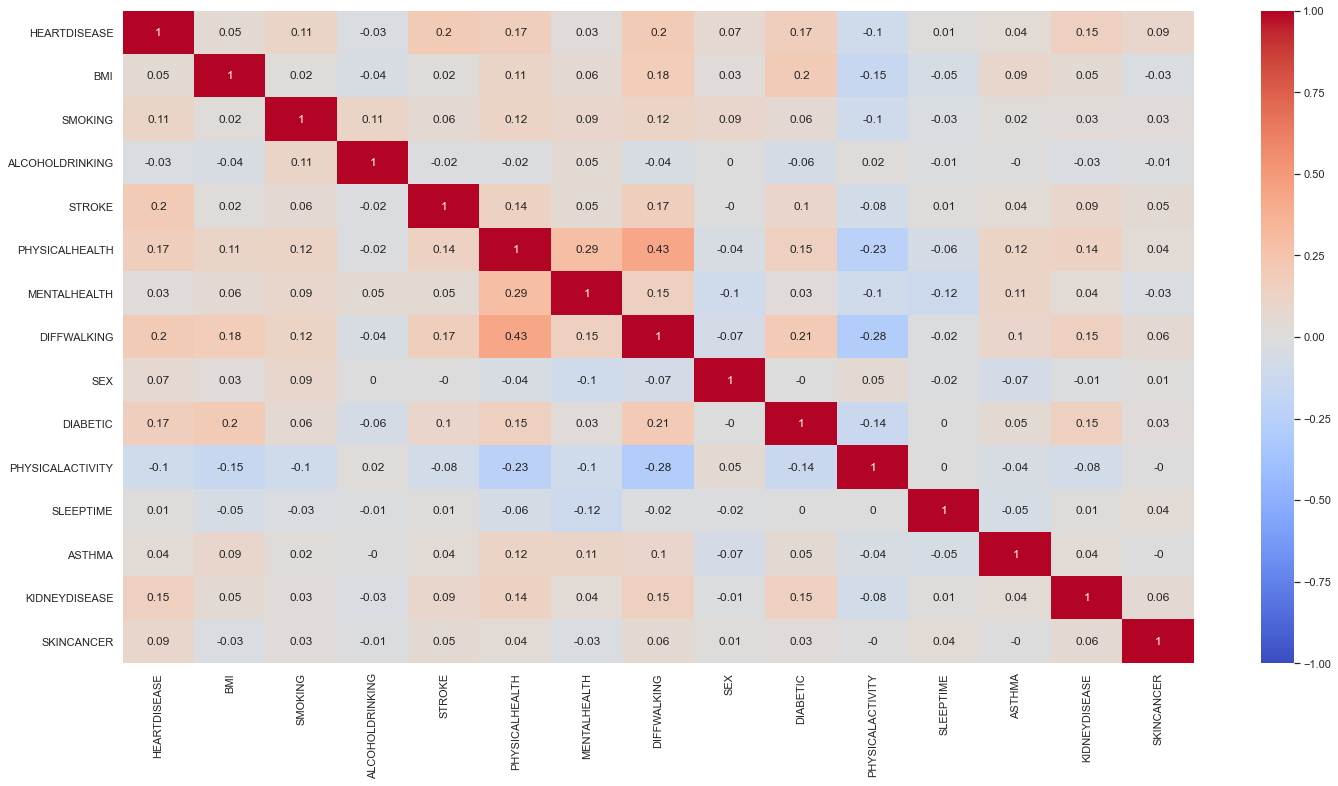

In [161]:
correlation = df.corr().round(2)
plt.figure(figsize = (24,12))
sb.heatmap(correlation, annot = True, cmap = 'coolwarm',vmin=-1,vmax=1)

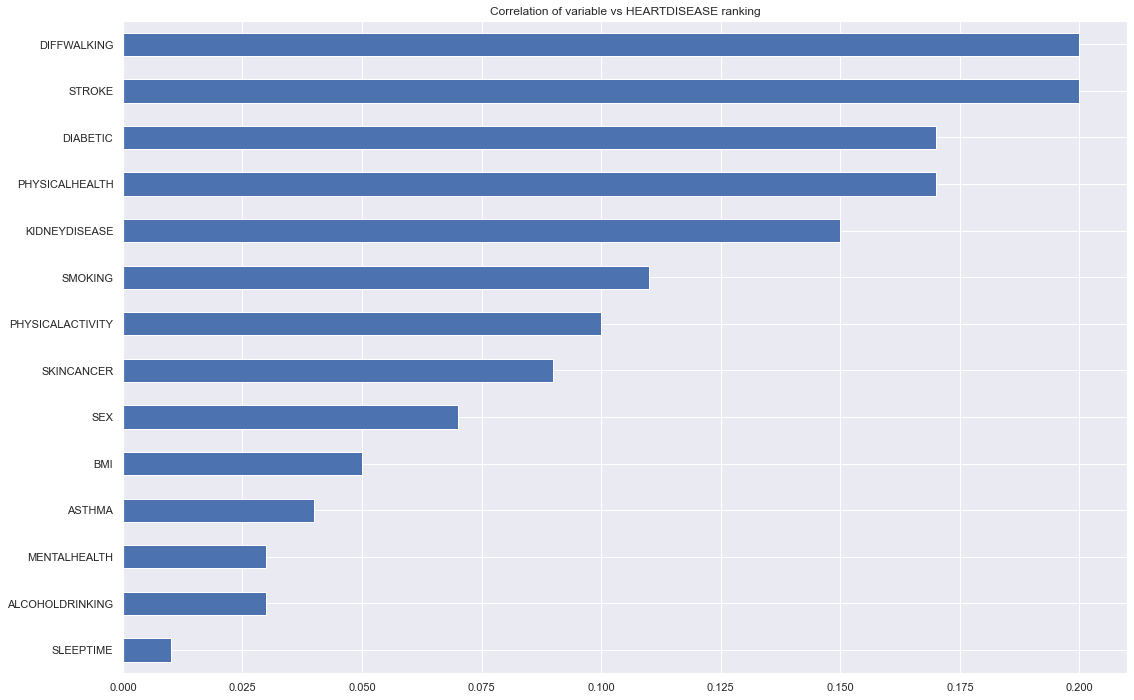

In [162]:
plt.figure(figsize = (18,12))
plt.title('Correlation of variable vs HEARTDISEASE ranking')
abs(correlation['HEARTDISEASE']).sort_values()[:-1].plot.barh()
plt.show()

Physical health seems to be a good predictor

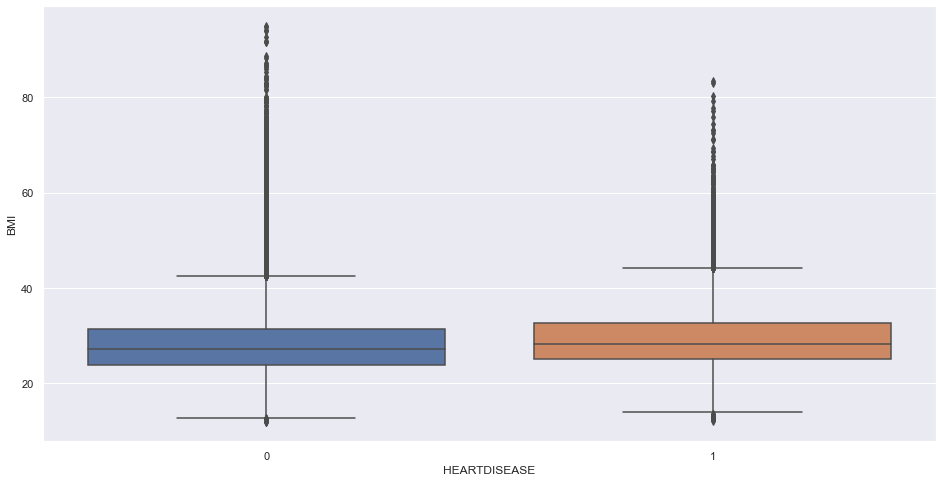

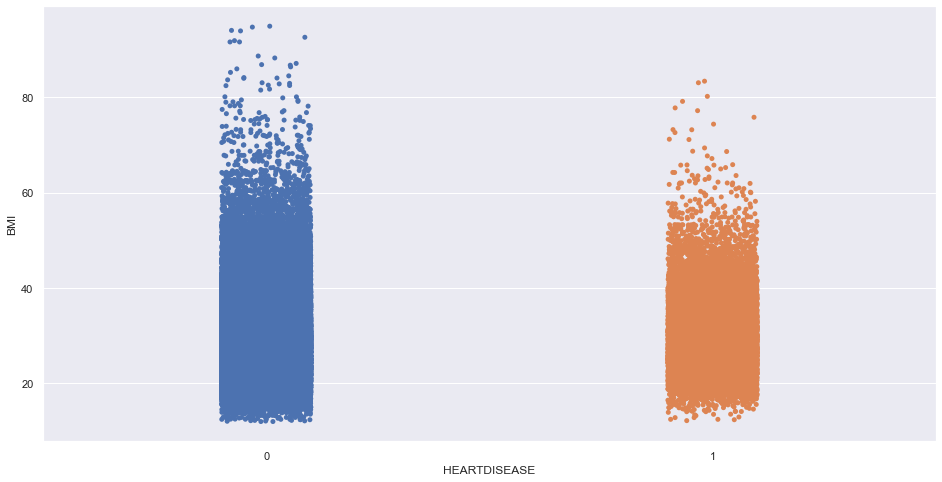

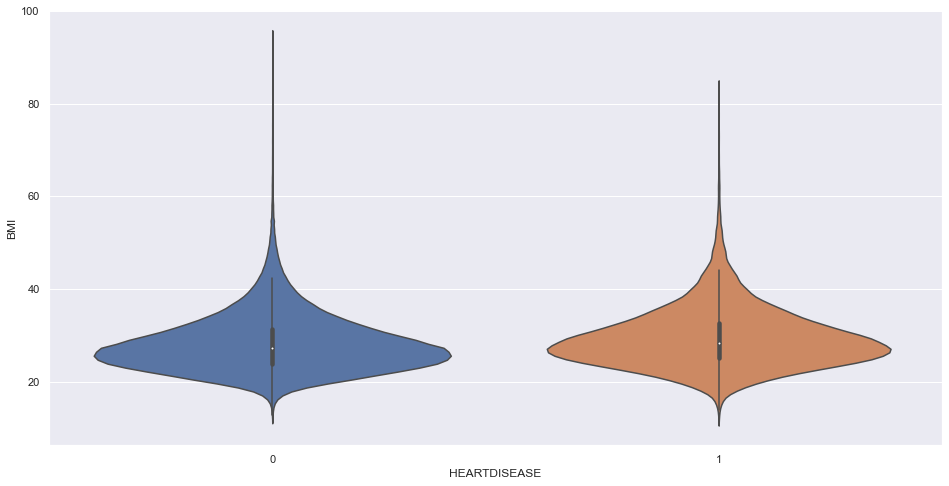

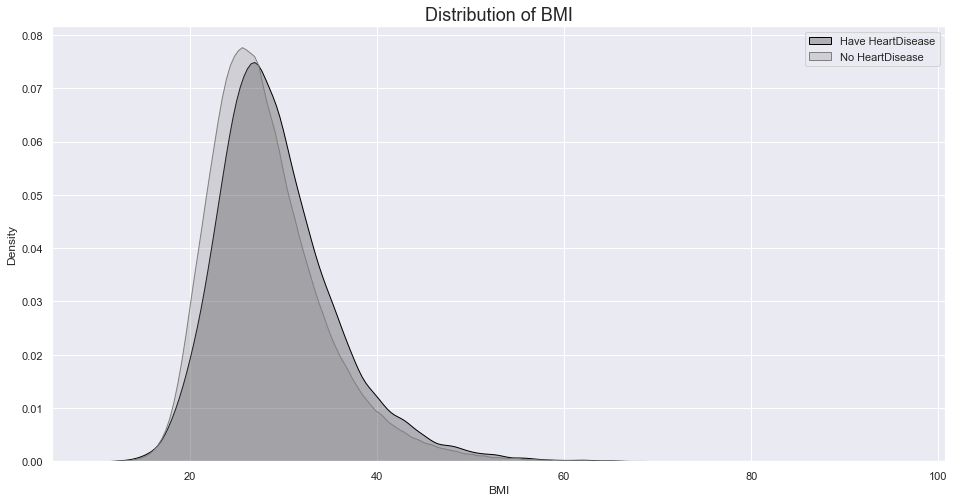

In [163]:
biNumAnalysis('BMI',df)

BMI seems not a significant predictor as the distribution of BMI having heart disease does not shows significant difference to those who dont have heart disease

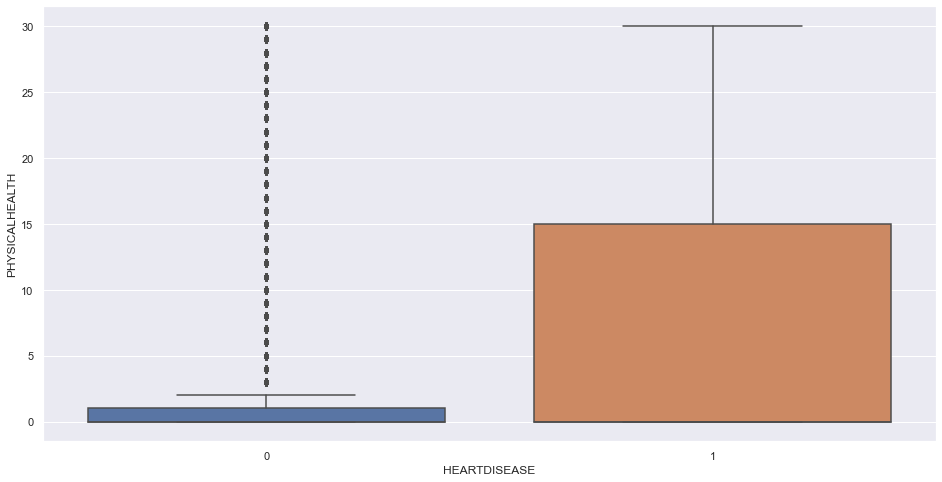

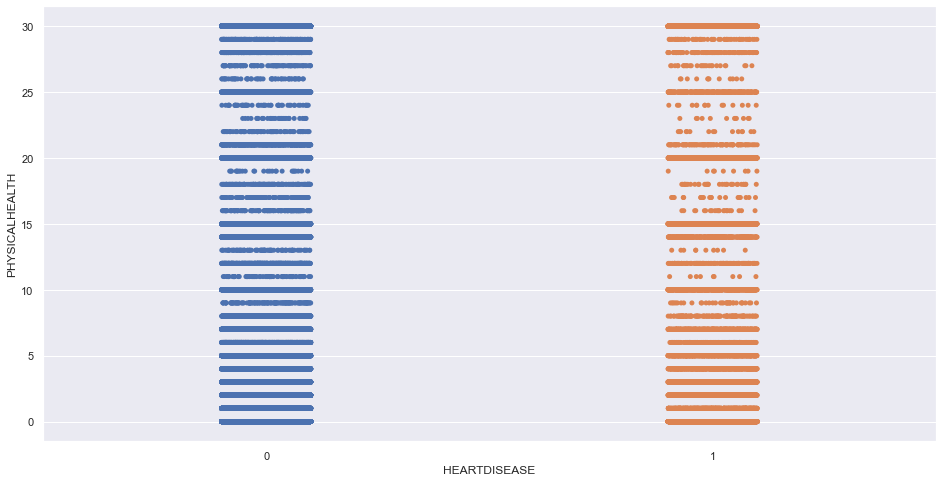

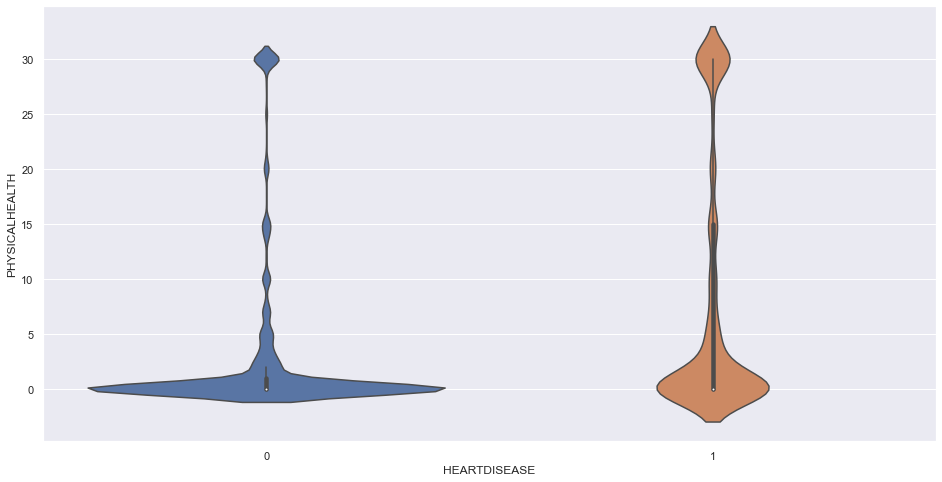

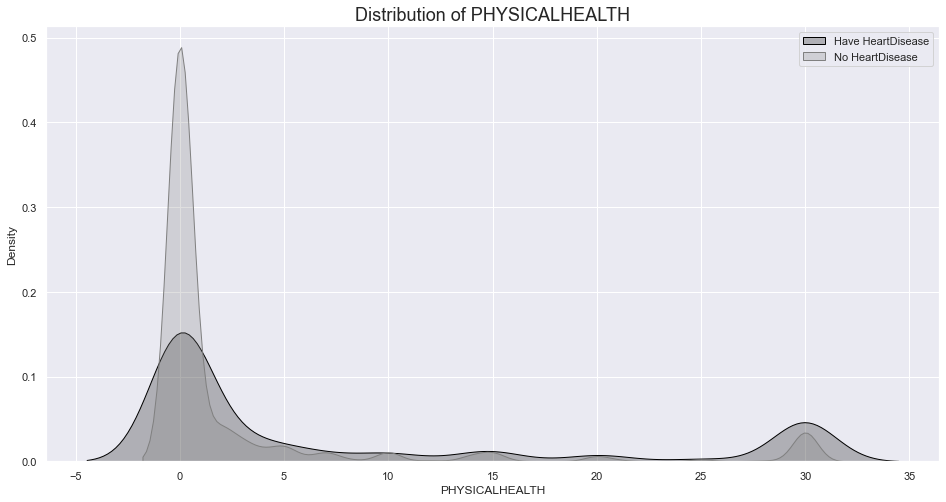

In [164]:
biNumAnalysis("PHYSICALHEALTH",df)

Physical health seems to be a possible predictor as given a person dont have HEARTDISEASE, the probability of PHYSCIALHEALTH = 0 is high.

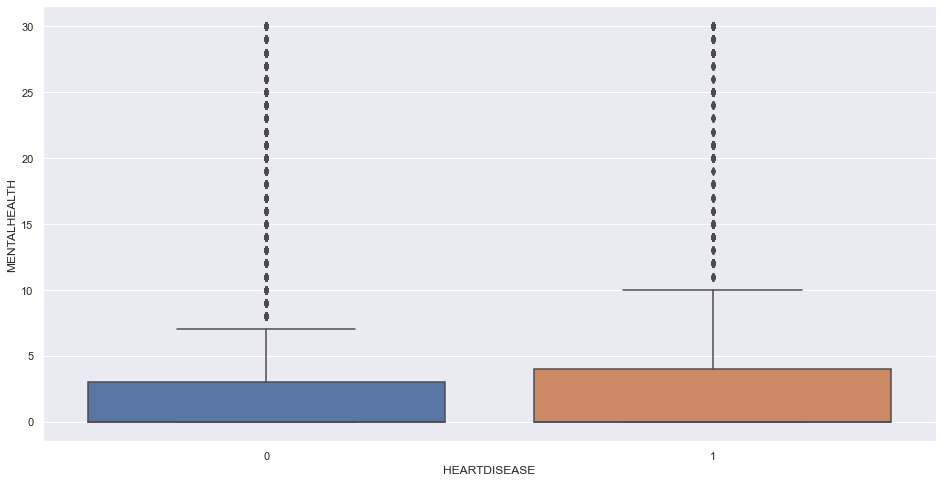

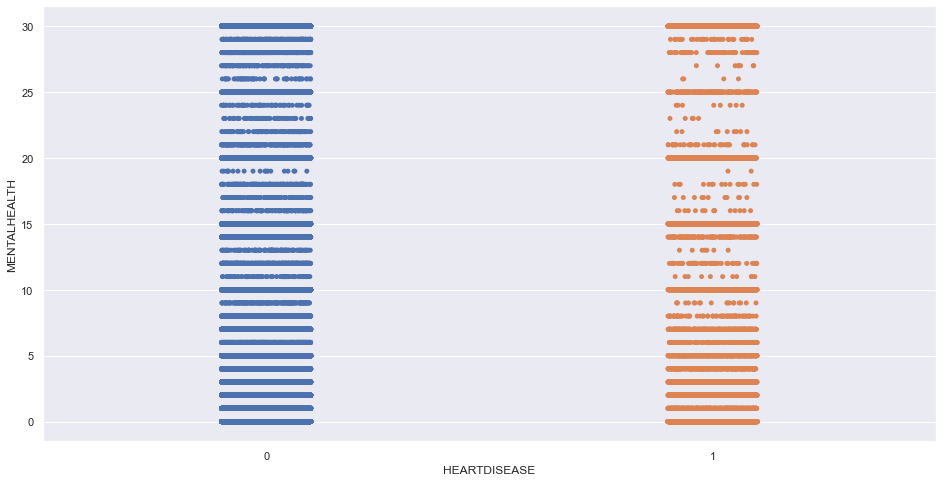

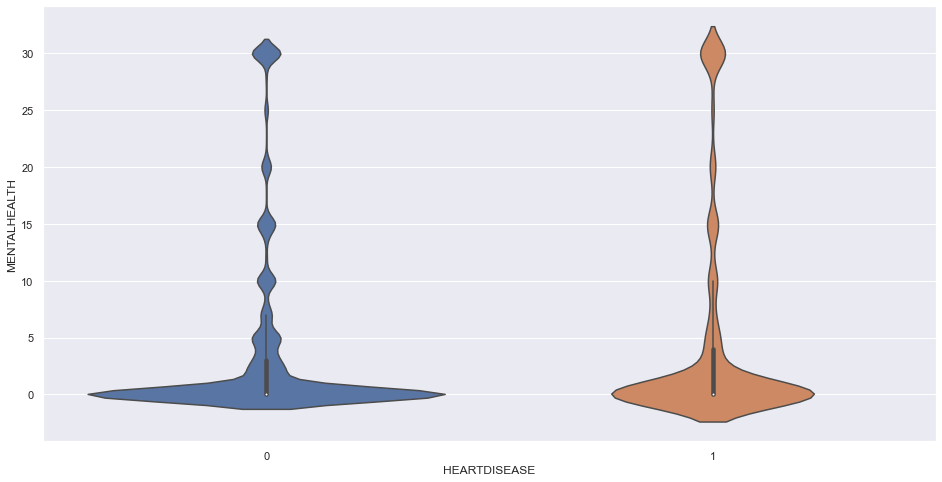

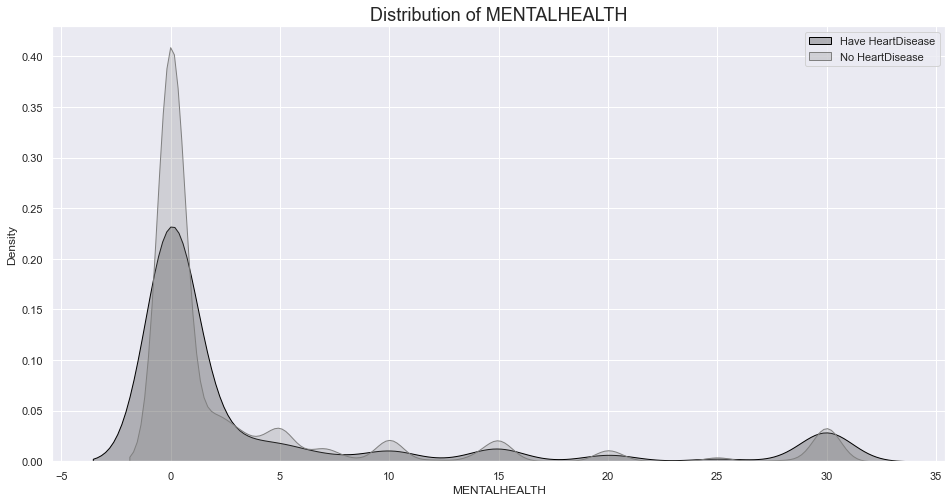

In [165]:
biNumAnalysis('MENTALHEALTH',df)

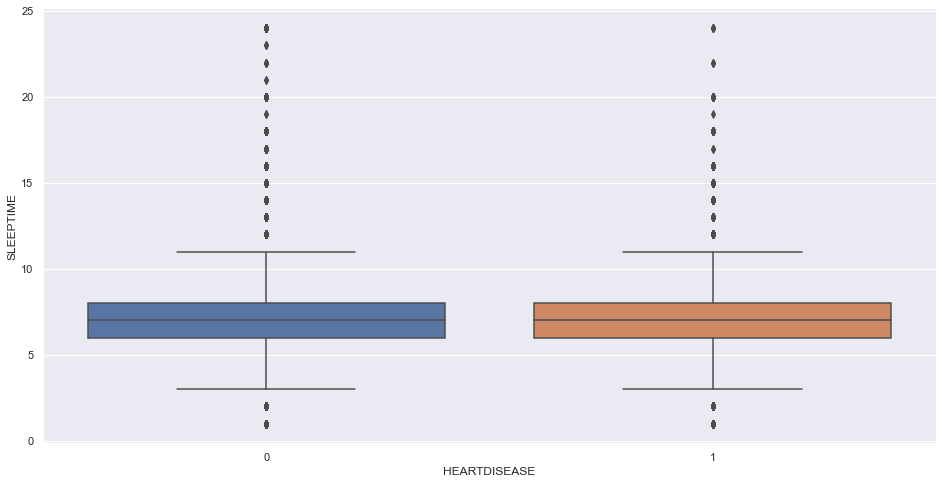

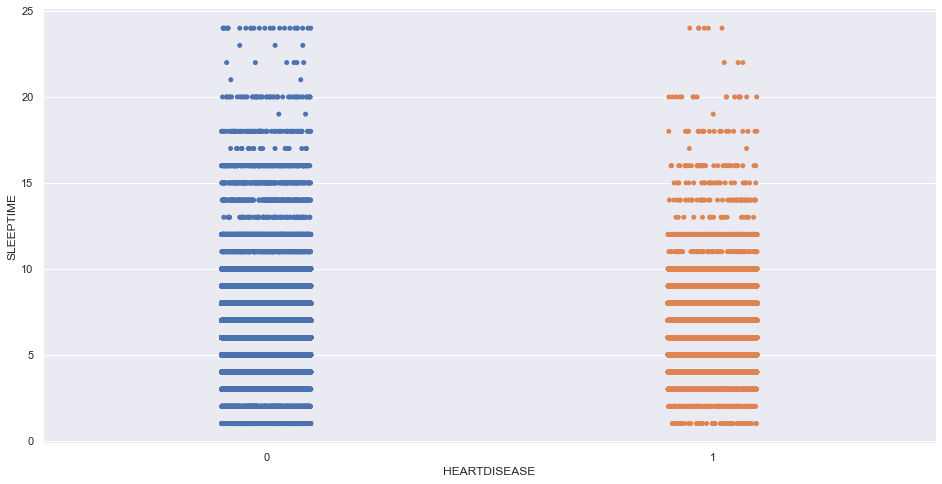

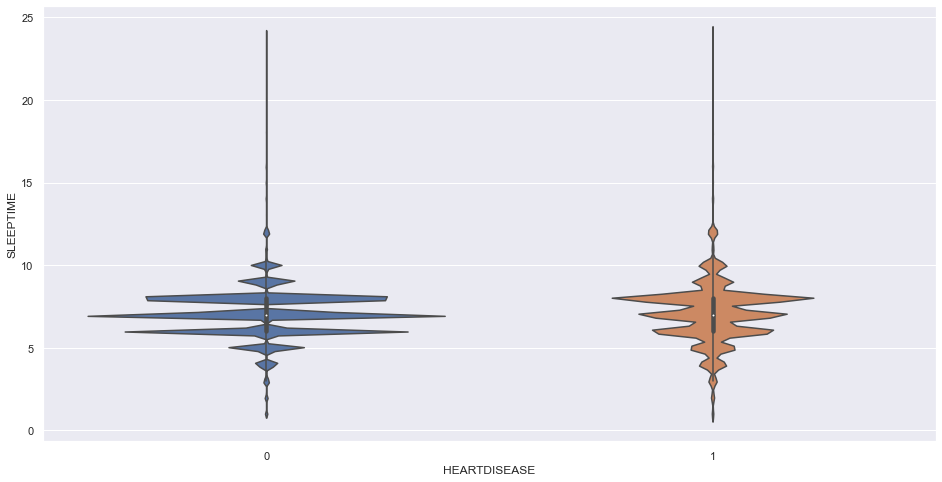

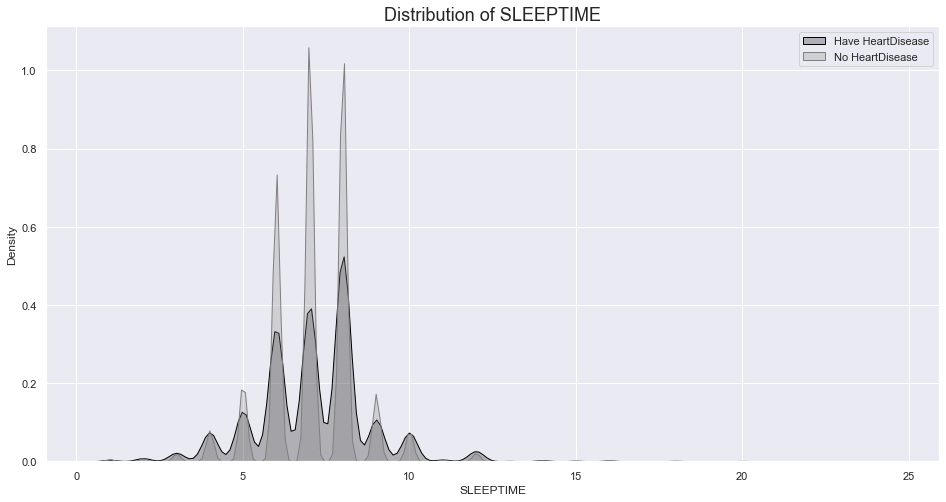

In [166]:
biNumAnalysis('SLEEPTIME',df)

# Complex relationship with Heart Disease

In [167]:
#Display the distribution of strNum under different combination of categories according to strCat and HEARTDISEASE
def complexCatAndNum(strNum,strCat):
    f = plt.figure(figsize=(24, 8))
    sb.catplot( x= strNum, y = 'HEARTDISEASE', row = strCat, data = df, kind = 'box', aspect = 4,orient='h')

In [168]:
#Display the number of people under different combination of categories according to strX,strY,and HEARTDISEASE
def complexCatAndCat(strX,strY,dataframe):
    f = plt.figure(figsize=(24, 16))
    sb.catplot(x=strX, hue="HEARTDISEASE", col=strY,
                data=dataframe, kind="count",
                height=4, aspect=.7);

In [169]:
#return the number of people of heartDiseaseStatus, under condition strXState and strYState
def getCountCatAndCat(strX,strXState,strY,strYState,heartDiseaseStatus,df):
    count = 0;
    for i in range (0, df["HEARTDISEASE"].count()):
        if(df[strX][i]==strXState and df[strY][i]==strYState and df["HEARTDISEASE"][i]==heartDiseaseStatus):
            count += 1
    return count

In [177]:
#print the probability of having heart disease under different combination of categories of strX and strY
def printProbability(strX,strY,df):
#Under condition strYState = 0    
#X[0][0] = number of people who no strXState && no heart disease
#X[0][1] = number of people who no strXState && has heart disease
#X[1][0] = number of people who has strXState && no heart disease
#X[1][1] = number of people who has strXState && has heart disease

#if no strXState && no strYState, then P(heartdisease) =X[0][1]/(X[0][0]+X[0][1])
#if has strXState && no strYState, then P(heartdisease) =X[1][1]/(X[1][0]+X[1][1])
    if(strX=="SEX"): titleX1 , titleX2 = "Female" , "Male"
    else: titleX1 , titleX2 = "No "+strX, "Has "+strX
        
    if(strY=="SEX"): titleY1 , titleY2 = "Female" , "Male"
    else: titleY1 , titleY2 = "No "+strY, "Has "+strY
        
    strYStatus = 0
    X= []
    for i in range(2):
        Y=[]
        for j in range(2):
            count = getCountCatAndCat(strX,i,strY,strYStatus,j,df)
            Y.append(count)
        X.append(Y)
    print("Probability of Having Heart Disease: ")
    print("                              "+titleX1,"             "+titleX2)
    print(titleY1,"          ",X[0][1]/(X[0][0]+X[0][1]),"     ",X[1][1]/(X[1][0]+X[1][1]))
#Under condition strYState = 1    
#X[0][0] = number of people who no strXState && no heart disease
#X[0][1] = number of people who no strXState && has heart disease
#X[1][0] = number of people who has strXState && no heart disease
#X[1][1] = number of people who has strXState && has heart disease

#if no strXState && has strYState, then P(heartdisease) =X[0][1]/(X[0][0]+X[0][1])
#if has strXState && has strYState, then P(heartdisease) =X[1][1]/(X[1][0]+X[1][1])

    strYStatus = 1
    X= []
    for i in range(2):
        Y=[]
        for j in range(2):
            count = getCountCatAndCat(strX,i,strY,strYStatus,j,df)
            Y.append(count)
        X.append(Y)
    print(titleY2,"          ",X[0][1]/(X[0][0]+X[0][1]),"     ",X[1][1]/(X[1][0]+X[1][1]))

In [171]:
#Display scatter plot of strNumX and strNumY, whether a  person gets heart disease is differentiated by the color of dots
def complexNumAndNum(strNumX,strNumY):
    f = plt.figure(figsize=(16, 8))
    sb.scatterplot(x = strNumX, y = strNumY, hue = 'HEARTDISEASE', data = df,palette="coolwarm")
    
    ##Example palette colour: husl;Set2;Paired;rocket;mako;flare;crest;magma;viridis;rocket_r;cubehelix;icefire

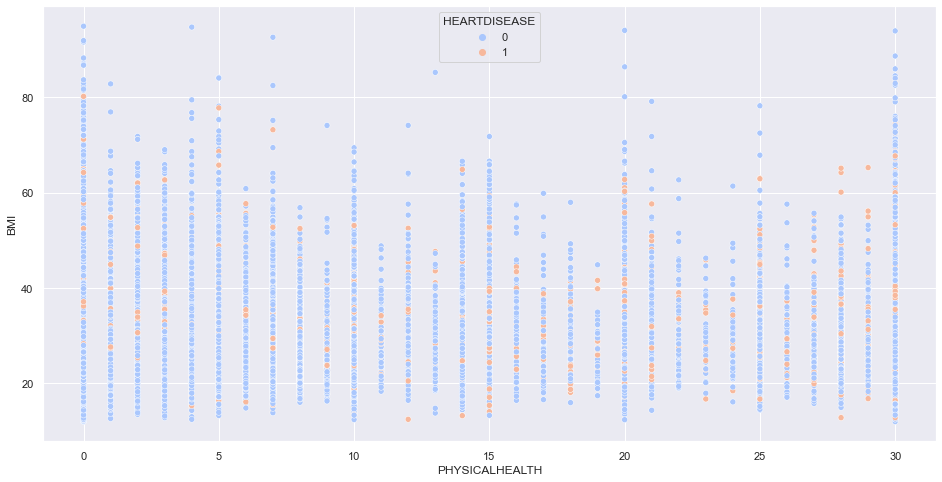

In [172]:
complexNumAndNum("PHYSICALHEALTH","BMI")

Text(0.5, 1.0, 'Dont Have Heart Disease')

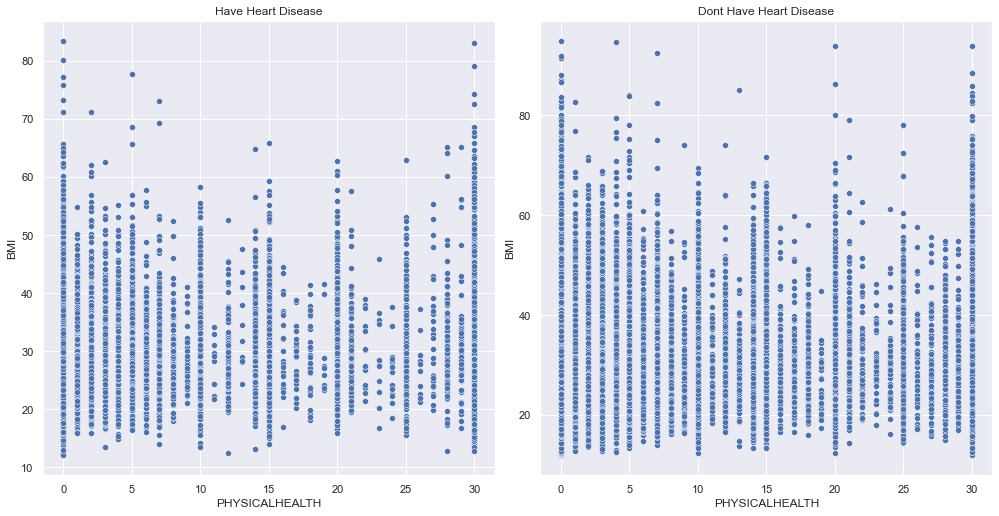

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [173]:
strNumX = "PHYSICALHEALTH"
strNumY = "BMI"
fig,ax = plt.subplots(1,2,figsize=(14,7))
fig.tight_layout(h_pad=2)
fig = plt.figure(figsize=(16,8))
sb.scatterplot(x = strNumX, y = strNumY, data = df[df['HEARTDISEASE']==1],ax=ax[0])
ax[0].set_title("Have Heart Disease")
fig = plt.figure(figsize=(16,8))
sb.scatterplot(x = strNumX, y = strNumY, data = df[df['HEARTDISEASE']==0],ax=ax[1])
ax[1].set_title("Dont Have Heart Disease")

Probability of Having Heart Disease: 
                              Female              Male
No DIFFWALKING            0.04335496343257592       0.08349048898920453
Has DIFFWALKING            0.1894045598760422       0.28282478039759595


<Figure size 1728x1152 with 0 Axes>

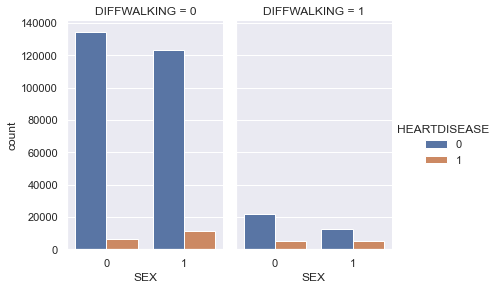

In [178]:
strX = "SEX"
strY = "DIFFWALKING"
printProbability(strX,strY,df)
complexCatAndCat(strX,strY,df)

Probability of Male having heart disease is higher than Female, under both condition DIFFWALKING = 0 and DIFFWALKING = 1

Hence, I would claim that "SEX" is still a possible predictor of HEARTDISEASE.

<Figure size 1728x576 with 0 Axes>

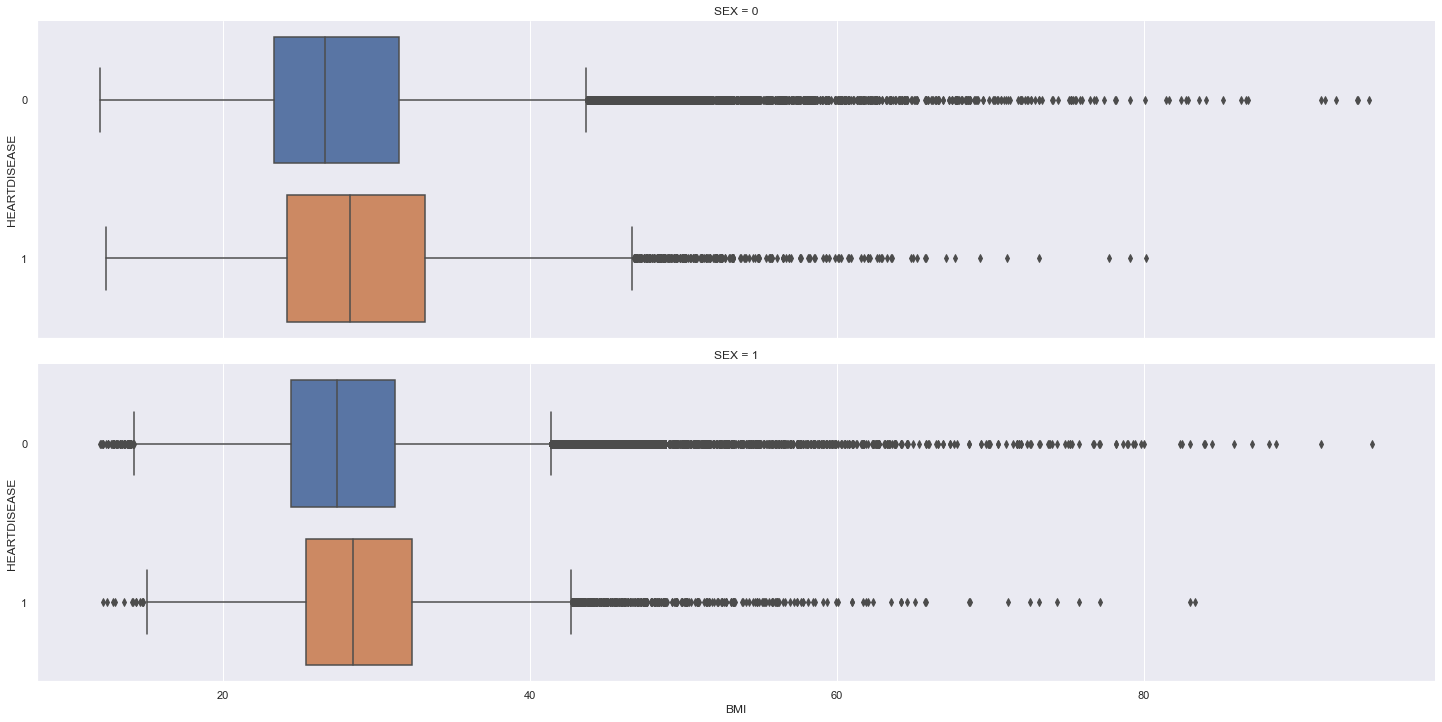

In [175]:
complexCatAndNum("BMI","SEX")